In [1]:
import os
import pandas as pd
import numpy as np
#from matplotlib import pyplot, pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MLP_df=pd.read_csv('City_MedianListingPrice_AllHomes.csv')
MLP_df.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,New York,NY,"New York, NY",Queens,1,459000.0,449990.0,429500.0,430000.0,449000.0,...,870000.0,850000.0,848000.0,829000.0,799000.0,808000.0,850000.0,848000.0,835000.0,799999.0
1,Los Angeles,CA,"Los Angeles, CA",Los Angeles,2,434900.0,419000.0,429000.0,429000.0,429000.0,...,749950.0,750000.0,760000.0,780000.0,789000.0,799000.0,799000.0,799999.0,799950.0,799000.0
2,Chicago,IL,"Chicago, IL",Cook,3,269770.0,274500.0,272500.0,272138.0,269000.0,...,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,326950.0,325000.0,324900.0,319900.0
3,Houston,TX,"Houston, TX",Harris,4,NaN,NaN,NaN,NaN,NaN,...,325000.0,324999.0,325000.0,329000.0,331813.5,336990.0,335000.0,334500.0,328000.0,324187.0
4,Philadelphia,PA,"Philadelphia, PA",Philadelphia,5,141700.0,149900.0,159900.0,157000.0,159900.0,...,199900.0,190000.0,189900.0,195000.0,199900.0,205900.0,215500.0,223500.0,220000.0,215000.0


In [3]:
MLP_Mean_State_df=MLP_df.groupby(by='State').mean().drop(columns='SizeRank')
MLP_Mean_State_df.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
State,,,,,,,,,,,,,,,,,,,,,
AK,242337.500000,245225.000000,249858.333333,249583.333333,250282.916667,249229.166667,248166.666667,247568.750000,246191.666667,242966.666667,...,270173.111111,268672.055556,267981.555556,268940.972222,272252.305556,278862.277778,280305.555556,281032.916667,282644.500000,280030.555556
AL,189129.870130,188880.766234,187586.142857,183076.116883,183106.467949,181403.846154,180792.474359,181682.788462,180280.221519,178304.569620,...,189617.839695,189573.267176,190526.469466,190361.664122,192344.969466,195000.068702,196595.923664,197435.805344,197025.209924,197810.736641
AR,151377.380952,150679.666667,150211.202381,149002.142857,150456.047619,150631.547619,150773.285714,150191.261905,148294.857143,148502.833333,...,161639.785714,162177.571429,162451.857143,162220.103896,163658.779221,164323.227273,164696.974026,165607.032468,165845.305195,167228.214286
AZ,252766.645833,249120.072917,246419.427083,243486.958333,274002.714286,267226.295918,260908.908163,257374.260000,252752.250000,254058.000000,...,300865.700000,301721.247059,304609.005882,305592.782353,307728.476471,308692.052941,309855.900000,310751.247059,309967.941176,313168.270588
CA,450823.884454,445272.276151,439722.801255,439679.635983,440383.623431,439031.476987,435775.276151,436606.759414,429688.420502,425183.228033,...,627737.320346,631059.415584,635099.733766,640363.457792,643170.337662,650435.560606,655116.021645,656497.728355,655603.258658,654074.308442


In [4]:
MLP_Mean_State_df.T.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2010-01,242337.500000,189129.870130,151377.380952,252766.645833,450823.884454,298243.959016,383009.645631,329500.0,283896.2500,242352.905660,...,179875.000000,189648.707792,202868.740437,214301.404762,304162.026786,217063.636364,289338.271429,189609.405556,159500.000000,218540.0
2010-02,245225.000000,188880.766234,150679.666667,249120.072917,445272.276151,296703.557377,382451.038835,339000.0,284912.5625,240033.073113,...,171057.000000,189781.818182,202091.707650,211842.321429,302076.816964,222733.333333,285649.847619,190056.076923,158821.026316,211535.0
2010-03,249858.333333,187586.142857,150211.202381,246419.427083,439722.801255,291732.795082,381938.242718,349500.0,277122.4800,235785.079812,...,171335.714286,187846.142857,200201.967568,210225.273810,303746.013158,223704.166667,283814.804762,189478.291209,154767.500000,209355.0
2010-04,249583.333333,183076.116883,149002.142857,243486.958333,439679.635983,289566.721311,378331.990291,360000.0,277078.1000,232321.988263,...,170971.428571,185912.230769,199171.865591,210764.476190,305379.175439,222845.833333,281045.480952,188903.571429,153337.500000,207680.0
2010-05,250282.916667,183106.467949,150456.047619,274002.714286,440383.623431,290732.868852,375367.703883,360000.0,280538.4400,230061.255869,...,173657.142857,185307.455696,199756.970430,209582.714286,306454.056522,224562.500000,280214.735849,191045.704301,152778.571429,209575.0


In [5]:
MLP_Mean_State_df.T.loc[:,['CA']]

State,CA
2010-01,450823.884454
2010-02,445272.276151
2010-03,439722.801255
2010-04,439679.635983
2010-05,440383.623431
2010-06,439031.476987
2010-07,435775.276151
2010-08,436606.759414
2010-09,429688.420502
2010-10,425183.228033


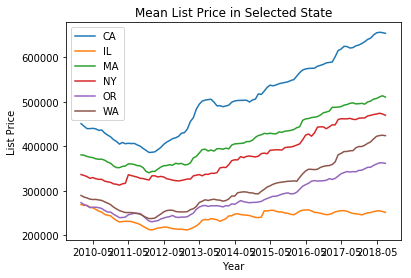

In [6]:

SelectedStateList=['CA','IL','MA','NY','OR','WA']
Fig0=plt.figure()
AxeF0=Fig0.add_subplot(1,1,1)
AxeF0.plot(MLP_Mean_State_df.T.loc[:,SelectedStateList])
Xtick=['2010-05', '2011-05','2012-05', '2013-05', '2014-05', '2015-05', '2016-05', '2017-05', '2018-05']
AxeF0.set_xticks(Xtick)
AxeF0.set_xlabel('Year')
AxeF0.set_ylabel('List Price')
AxeF0.legend(SelectedStateList)
AxeF0.set_title('Mean List Price in Selected State')
Fig0.savefig('Mean_List_Price_SelectedState.png')

#MLP_Mean_State_df.T.loc[:,['CA','IL','MA','NY','OR','WA']].plot()
#plt.xlabel("AAAA")
#plt.savefig('Test.png')

In [7]:
MLP_Chi_df=MLP_df[MLP_df.Metro=='Chicago, IL']
MLP_Bos_df=MLP_df[MLP_df.Metro=='Boston, MA']
MLP_NY_df=MLP_df[MLP_df.Metro=='New York, NY']
MLP_Seat_df=MLP_df[MLP_df.Metro=='Seattle, WA']
MLP_SF_df=MLP_df[MLP_df.Metro=='San Francisco, CA']
MLP_LA_df=MLP_df[MLP_df.Metro=='Los Angeles, CA']


MLP_Chi_df.head(10)

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
2,Chicago,IL,"Chicago, IL",Cook,3,269770.0,274500.0,272500.0,272138.0,269000.0,...,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,326950.0,325000.0,324900.0,319900.0
153,Aurora,IL,"Chicago, IL",Kane,154,170000.0,169900.0,169900.0,169900.0,164900.0,...,200000.0,199900.0,199000.0,209900.0,215000.0,220000.0,220000.0,217150.0,214800.0,209250.0
178,Naperville,IL,"Chicago, IL",Du Page,179,363000.0,369949.5,374000.0,369900.0,369250.0,...,449900.0,445000.0,445000.0,439990.0,434900.0,439000.0,439764.5,439500.0,433990.0,433990.0
246,Joliet,IL,"Chicago, IL",Will,247,150000.0,149200.0,147650.0,145000.0,144500.0,...,159900.0,159200.0,160000.0,169900.0,162450.0,160000.0,169900.0,169900.0,168000.0,164900.0
370,Kenosha,WI,"Chicago, IL",Kenosha,371,149900.0,154900.0,149900.0,149900.0,147250.0,...,141450.0,140000.0,144900.0,145000.0,149900.0,159900.0,159900.0,159900.0,159900.0,159900.0
384,Elgin,IL,"Chicago, IL",Kane,385,184000.0,184900.0,182000.0,180950.0,179900.0,...,200375.0,205000.0,210000.0,217950.0,221900.0,224900.0,224900.0,219998.0,219900.0,217000.0
425,Cicero,IL,"Chicago, IL",Cook,426,NaN,NaN,NaN,NaN,NaN,...,167900.0,170078.5,168450.0,174900.0,179900.0,179000.0,178200.0,179450.0,182169.5,187876.0
504,Arlington Heights,IL,"Chicago, IL",Cook,505,290000.0,289900.0,295000.0,289900.0,289000.0,...,349900.0,349949.5,359450.0,369900.0,359900.0,359900.0,364000.0,358000.0,349912.5,345000.0
511,Evanston,IL,"Chicago, IL",Cook,512,307500.0,300000.0,308000.0,308000.0,310000.0,...,350000.0,354500.0,373000.0,373000.0,371450.0,379000.0,385000.0,389950.0,385000.0,379000.0
520,Waukegan,IL,"Chicago, IL",Lake,521,125000.0,130000.0,135950.0,129950.0,128900.0,...,129900.0,129900.0,129900.0,129999.0,130100.0,139900.0,140000.0,141950.0,139838.5,142187.5


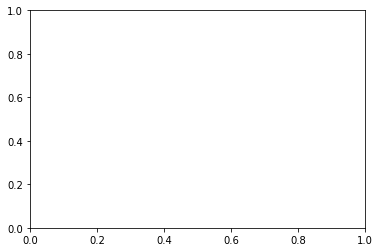

In [8]:
Fig0=plt.figure()
AxeF0=Fig0.add_subplot(1,1,1)




In [9]:
MLP_Chi_History_df=MLP_Chi_df.mean(axis='rows').iloc[5:]
MLP_Bos_History_df=MLP_Bos_df.mean(axis='rows').iloc[5:]
MLP_NY_History_df=MLP_NY_df.mean(axis='rows').iloc[5:]
MLP_Seat_History_df=MLP_Seat_df.mean(axis='rows').iloc[5:]
MLP_SF_History_df=MLP_SF_df.mean(axis='rows').iloc[5:]
MLP_LA_History_df=MLP_LA_df.mean(axis='rows').iloc[5:]

In [10]:
MLP_Chi_History_df.head()

2010-05    287293.899441
2010-06    285046.628492
2010-07    280965.581006
2010-08    278526.558659
2010-09    272022.036313
dtype: float64

In [11]:
Time=MLP_df.columns[5:]

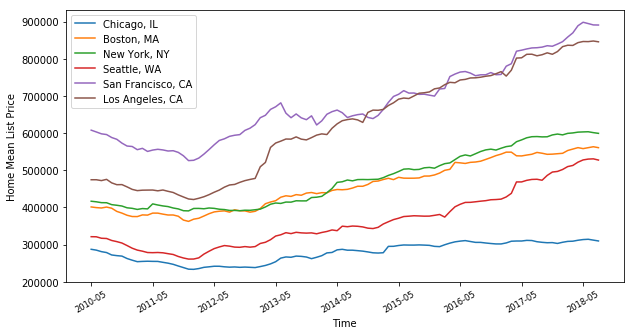

In [12]:
Fig1=plt.figure(figsize=[10,5])
AxeF1=Fig1.add_subplot(1,1,1)
AxeF1.plot(MLP_Chi_History_df, label='Chicago, IL')
AxeF1.plot(MLP_Bos_History_df, label='Boston, MA')
AxeF1.plot(MLP_NY_History_df, label='New York, NY')
AxeF1.plot(MLP_Seat_History_df, label='Seattle, WA')
AxeF1.plot(MLP_SF_History_df, label='San Francisco, CA')
AxeF1.plot(MLP_LA_History_df, label='Los Angeles, CA')
Xtick=['2010-05', '2011-05','2012-05', '2013-05', '2014-05', '2015-05', '2016-05', '2017-05', '2018-05']
AxeF1.set_xticks(Xtick)
AxeF1.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF1.set_xlabel('Time')
AxeF1.set_ylabel('Home Mean List Price')
AxeF1.legend()
#plt.subplots_adjust(left=0.2)
plt.show()
Fig1.savefig('SelectedMetroListPrice.png', dpi=400)

In [13]:
# above for figure 1

In [14]:
SP_df=pd.read_csv('Sale_Prices_City.csv')

In [15]:
SP_df.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,6181.0,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,544500.0,549400.0,563900.0,574200.0,583200.0,583100.0,581100.0,567600.0,562000.0,567100.0
1,12447.0,Los Angeles,California,2,510000.0,481300.0,463200.0,452700.0,434800.0,419500.0,...,670900.0,679000.0,696900.0,702200.0,713200.0,704300.0,700000.0,702400.0,695900.0,699600.0
2,17426.0,Chicago,Illinois,3,326000.0,312800.0,292400.0,278300.0,274500.0,269300.0,...,273700.0,276600.0,282200.0,285200.0,305100.0,302900.0,300900.0,280300.0,278200.0,273000.0
3,6915.0,San Antonio,Texas,4,NaN,NaN,NaN,NaN,NaN,NaN,...,197500.0,201200.0,199000.0,195700.0,193600.0,195100.0,196700.0,195600.0,193200.0,NaN
4,13271.0,Philadelphia,Pennsylvania,5,109000.0,108800.0,110300.0,109500.0,107700.0,111200.0,...,147700.0,148400.0,152000.0,147200.0,144900.0,141700.0,144900.0,144600.0,144600.0,NaN


In [16]:
MLP_IL_df=MLP_df[MLP_df.State=='IL']
SP_IL_df=SP_df[SP_df.StateName=='Illinois']

In [17]:
SP_IL_df.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
2,17426.0,Chicago,Illinois,3,326000.0,312800.0,292400.0,278300.0,274500.0,269300.0,...,273700.0,276600.0,282200.0,285200.0,305100.0,302900.0,300900.0,280300.0,278200.0,273000.0
103,10215.0,Aurora,Illinois,104,202900.0,207100.0,195600.0,184600.0,165700.0,164400.0,...,189700.0,188400.0,184600.0,188200.0,192600.0,193400.0,195200.0,187600.0,184700.0,NaN
129,39931.0,Naperville,Illinois,130,NaN,NaN,NaN,NaN,NaN,NaN,...,352100.0,365600.0,364400.0,350700.0,349000.0,355900.0,355500.0,369400.0,381000.0,NaN
188,32238.0,Joliet,Illinois,189,NaN,NaN,NaN,NaN,NaN,NaN,...,137600.0,145100.0,158200.0,156000.0,163400.0,153800.0,152700.0,146400.0,147200.0,NaN
217,17943.0,Elgin,Illinois,218,182700.0,202700.0,201500.0,195900.0,187000.0,183200.0,...,184200.0,188900.0,175200.0,177200.0,185300.0,203100.0,197700.0,196700.0,198900.0,NaN


In [18]:
'IL' in MLP_df.State.values

True

In [19]:
# Rename index as RegionName
MLP_IL_df.index=MLP_IL_df.RegionName.values
SP_IL_df.index=SP_IL_df.RegionName.values

In [20]:
# List the RegionName which found in both dataframe: 
    # first merga two dataframe by column "RegionName"
    # then extract the RegionName in the merged dataframe
CommonIndex_ser=pd.merge(MLP_IL_df, SP_IL_df, how='inner', left_on='RegionName', right_on='RegionName').RegionName
CommonIndex_ser.head(2)

0    Chicago
1     Aurora
Name: RegionName, dtype: object

In [21]:
MLP_IL_df.loc[CommonIndex_ser].head(2)

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,Chicago,IL,"Chicago, IL",Cook,3,269770.0,274500.0,272500.0,272138.0,269000.0,...,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,326950.0,325000.0,324900.0,319900.0
Aurora,Aurora,IL,"Chicago, IL",Kane,154,170000.0,169900.0,169900.0,169900.0,164900.0,...,200000.0,199900.0,199000.0,209900.0,215000.0,220000.0,220000.0,217150.0,214800.0,209250.0


In [22]:
SP_IL_df.loc[CommonIndex_ser].head(2)

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,17426.0,Chicago,Illinois,3,326000.0,312800.0,292400.0,278300.0,274500.0,269300.0,...,273700.0,276600.0,282200.0,285200.0,305100.0,302900.0,300900.0,280300.0,278200.0,273000.0
Aurora,10215.0,Aurora,Illinois,104,202900.0,207100.0,195600.0,184600.0,165700.0,164400.0,...,189700.0,188400.0,184600.0,188200.0,192600.0,193400.0,195200.0,187600.0,184700.0,NaN


In [23]:
# check the length of extract data, they should be in a same length
print([len(CommonIndex_ser), len(MLP_IL_df.loc[CommonIndex_ser]), len(SP_IL_df.loc[CommonIndex_ser])])

[113, 113, 113]


In [24]:
MLP_IL_Region_df=MLP_IL_df.loc[CommonIndex_ser, MLP_IL_df.columns[5:]]
SP_IL_Region_df=SP_IL_df.loc[CommonIndex_ser, SP_IL_df.columns[4:]]

In [25]:
MLP_IL_Region_df.head(2)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,269770.0,274500.0,272500.0,272138.0,269000.0,269000.0,259900.0,259900.0,249800.0,250000.0,...,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,326950.0,325000.0,324900.0,319900.0
Aurora,170000.0,169900.0,169900.0,169900.0,164900.0,161500.0,159000.0,158950.0,154900.0,149900.0,...,200000.0,199900.0,199000.0,209900.0,215000.0,220000.0,220000.0,217150.0,214800.0,209250.0


In [26]:
SP_IL_Region_df.head(2)

,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,326000.0,312800.0,292400.0,278300.0,274500.0,269300.0,267100.0,266900.0,259200.0,254400.0,...,273700.0,276600.0,282200.0,285200.0,305100.0,302900.0,300900.0,280300.0,278200.0,273000.0
Aurora,202900.0,207100.0,195600.0,184600.0,165700.0,164400.0,173600.0,181600.0,187600.0,182700.0,...,189700.0,188400.0,184600.0,188200.0,192600.0,193400.0,195200.0,187600.0,184700.0,NaN


In [27]:
np.unique(CommonIndex_ser)

array(['Addison', 'Algonquin', 'Alton', 'Antioch', 'Arlington Heights',
       'Aurora', 'Bartlett', 'Batavia', 'Beach Park', 'Belleville',
       'Bellwood', 'Berwyn', 'Bolingbrook', 'Bridgeview', 'Brookfield',
       'Buffalo Grove', 'Burbank', 'Carpentersville', 'Cary', 'Chicago',
       'Cicero', 'Collinsville', 'Country Club Hills', 'Crest Hill',
       'Crete', 'Crystal Lake', 'Darien', 'Dekalb', 'Des Plaines',
       'Downers Grove', 'Elgin', 'Elmhurst', 'Evanston', 'Evergreen Park',
       'Fairview Heights', 'Flossmoor', 'Frankfort', 'Franklin Park',
       'Gages Lake', 'Geneva', 'Gilberts', 'Glen Carbon', 'Glen Ellyn',
       'Glendale Heights', 'Glenview', 'Godfrey', 'Gurnee',
       'Hanover Park', 'Highland Park', 'Hoffman Estates', 'Homer Glen',
       'Homewood', 'Huntley', 'Island Lake', 'Joliet', 'La Grange Park',
       'Lake Zurich', 'Lake in the Hills', 'Lemont', 'Libertyville',
       'Lindenhurst', 'Lockport', 'Lombard', 'Manhattan', 'Maryville',
       'Matteson

In [28]:
TestList=['Chicago', 'Naperville', 'Aurora','Bolingbrook','Downers Grove','Plainfield','Warrenville']
TestResult={}
for x in TestList:
    TestResult.update({x: x in CommonIndex_ser.values})

SelectRegionList=[]    
RemovedRegionList=[]
for x in TestResult:
    if TestResult[str(x)]==True:
        SelectRegionList.append(str(x))
    if TestResult[str(x)]==False:
        RemovedRegionList.append(str(x))

print('Selected Region:', SelectRegionList)
print('Removed Region:', RemovedRegionList)

Selected Region: ['Chicago', 'Naperville', 'Aurora', 'Bolingbrook', 'Downers Grove', 'Plainfield']
Removed Region: ['Warrenville']


In [29]:
pd.Series(SelectRegionList).values

array(['Chicago', 'Naperville', 'Aurora', 'Bolingbrook', 'Downers Grove',
       'Plainfield'], dtype=object)

In [30]:
MLP_IL_SelectedRegion_df=MLP_IL_Region_df.loc[SelectRegionList]
SP_IL_SelectedRegion_df=SP_IL_Region_df.loc[SelectRegionList]


In [31]:
MLP_IL_SelectedRegion_df

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,269770.0,274500.0,272500.0,272138.0,269000.0,269000.0,259900.0,259900.0,249800.0,250000.0,...,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,326950.0,325000.0,324900.0,319900.0
Naperville,363000.0,369949.5,374000.0,369900.0,369250.0,369900.0,369900.0,369000.0,359900.0,355000.0,...,449900.0,445000.0,445000.0,439990.0,434900.0,439000.0,439764.5,439500.0,433990.0,433990.0
Aurora,170000.0,169900.0,169900.0,169900.0,164900.0,161500.0,159000.0,158950.0,154900.0,149900.0,...,200000.0,199900.0,199000.0,209900.0,215000.0,220000.0,220000.0,217150.0,214800.0,209250.0
Bolingbrook,199000.0,195000.0,206900.0,205000.0,204900.0,200000.0,199000.0,199000.0,189900.0,187750.0,...,229500.0,225000.0,222250.0,225000.0,227900.0,234200.0,237950.0,234900.0,239949.5,239999.0
Downers Grove,314900.0,316000.0,314000.0,309900.0,324700.0,319999.5,309900.0,309900.0,290000.0,289700.0,...,399900.0,399900.0,395000.0,399900.0,399900.0,399000.0,389900.0,387500.0,391000.0,389000.0
Plainfield,234200.0,229900.0,229500.0,224900.0,224900.0,219935.0,219900.0,215000.0,214450.0,209900.0,...,264900.0,265500.0,269900.0,274950.0,269800.0,269900.0,272000.0,274900.0,271400.0,272370.0


In [32]:
SP_IL_SelectedRegion_df

,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,326000.0,312800.0,292400.0,278300.0,274500.0,269300.0,267100.0,266900.0,259200.0,254400.0,...,273700.0,276600.0,282200.0,285200.0,305100.0,302900.0,300900.0,280300.0,278200.0,273000.0
Naperville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352100.0,365600.0,364400.0,350700.0,349000.0,355900.0,355500.0,369400.0,381000.0,NaN
Aurora,202900.0,207100.0,195600.0,184600.0,165700.0,164400.0,173600.0,181600.0,187600.0,182700.0,...,189700.0,188400.0,184600.0,188200.0,192600.0,193400.0,195200.0,187600.0,184700.0,NaN
Bolingbrook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203900.0,215100.0,216400.0,211800.0,204100.0,211500.0,215200.0,214400.0,204000.0,NaN
Downers Grove,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287200.0,286900.0,294200.0,340800.0,337100.0,333500.0,319900.0,324600.0,320000.0,297500.0
Plainfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237800.0,241100.0,238300.0,240800.0,247500.0,249900.0,253600.0,249200.0,247500.0,NaN


In [33]:
#SP_IL_SelectedRegion_df.columns.get_loc('2010-05')
SP_IL_SelectedRegion_df.index.get_loc('Chicago')

0

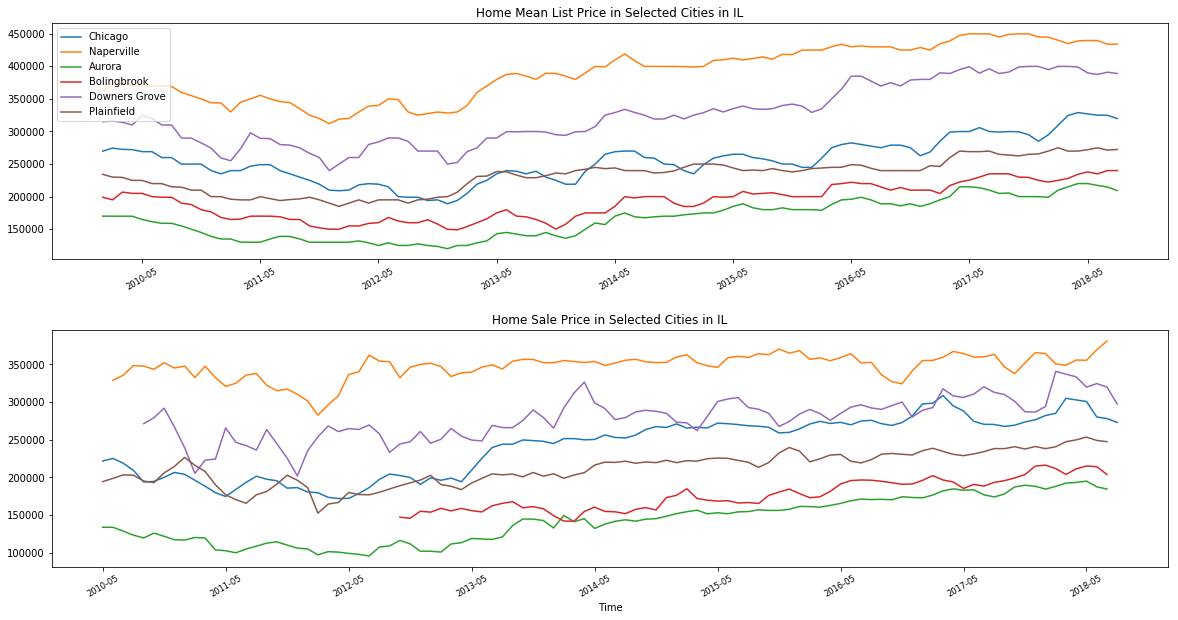

In [34]:
Fig2=plt.figure(figsize=[20,10])
AxeF2s1=Fig2.add_subplot(2,1,1)
AxeF2s2=Fig2.add_subplot(2,1,2)
Fig2.subplots_adjust(hspace=0.3)

for x in SP_IL_SelectedRegion_df.index.values:
    AxeF2s1.plot(MLP_IL_SelectedRegion_df.loc[x])
    AxeF2s2.plot(SP_IL_SelectedRegion_df.iloc[SP_IL_SelectedRegion_df.index.get_loc(x), 26:])


Xtick=['2010-05', '2011-05','2012-05', '2013-05', '2014-05', '2015-05', '2016-05', '2017-05', '2018-05']
AxeF2s1.set_xticks(Xtick)
AxeF2s2.set_xticks(Xtick)
AxeF2s1.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF2s2.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF2s2.set_xlabel('Time')
AxeF2s1.set_title('Home Mean List Price in Selected Cities in IL')
AxeF2s2.set_title('Home Sale Price in Selected Cities in IL')
AxeF2s1.legend()
#plt.subplots_adjust(left=0.2)
plt.show()
Fig2.savefig('SalePrice_SelectedCityIL.png', dpi=400)

In [35]:
# Above for Figure 2

In [36]:
STLR_df=pd.read_csv('SaleToListRatio_City.csv')
STLR_df.index=STLR_df.RegionName
STLR_df.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
New York,1,6181,New York,City,NY,0.902159,0.918836,0.894988,0.912621,0.916214,...,0.963731,0.962382,0.963001,0.962963,0.954774,0.961538,0.962280,0.967366,0.967742,0.966981
Los Angeles,2,12447,Los Angeles,City,CA,0.964513,0.951572,0.966480,0.969703,0.968750,...,0.997939,0.995232,0.990971,0.990724,1.000000,1.000000,1.000000,1.000003,1.000000,0.999537
Chicago,3,17426,Chicago,City,IL,0.901084,0.901442,0.900000,0.892921,0.909091,...,0.959803,0.957388,0.948071,0.947850,0.946182,0.970088,0.974332,0.971848,0.972743,0.968421
Houston,4,39051,Houston,City,TX,0.916043,0.920278,0.946354,0.940279,0.950663,...,0.933017,0.925287,0.924323,0.926382,0.929026,0.921594,0.921794,0.941292,0.921569,0.926994
San Antonio,5,6915,San Antonio,City,TX,0.989627,0.992689,0.982933,0.997768,0.993329,...,0.992692,0.987773,0.980975,0.983691,0.982560,0.993402,1.000000,1.000000,1.000000,1.000000


In [37]:
STLR_IL_df=STLR_df[STLR_df.StateName=='IL']
STLR_SelectedRegion_df=STLR_IL_df.loc[SelectRegionList]
STLR_SelectedRegion_df

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,3,17426,Chicago,City,IL,0.901084,0.901442,0.900000,0.892921,0.909091,...,0.959803,0.957388,0.948071,0.947850,0.946182,0.970088,0.974332,0.971848,0.972743,0.968421
Naperville,185,39931,Naperville,City,IL,0.853276,0.881429,0.888889,0.901886,0.858619,...,0.955910,0.951142,0.949392,0.945826,0.949392,0.958751,0.968765,0.977778,0.973107,0.965826
Aurora,141,10215,Aurora,City,IL,NaN,NaN,NaN,NaN,NaN,...,0.954545,0.967213,0.967070,0.961538,0.949845,0.979030,0.983198,0.983333,0.985750,0.983661
Bolingbrook,675,10484,Bolingbrook,City,IL,NaN,NaN,NaN,NaN,NaN,...,0.973070,0.976036,0.959346,0.950000,0.974002,0.969697,0.979257,0.978928,0.976744,0.980392
Downers Grove,848,24420,Downers Grove,City,IL,NaN,NaN,NaN,NaN,NaN,...,0.941424,0.944566,0.950000,0.947520,0.932420,0.950000,0.964187,0.948052,0.960287,0.949272
Plainfield,433,26534,Plainfield,City,IL,0.886822,0.890625,0.877841,0.935394,0.879599,...,0.966644,0.966132,0.956938,0.959575,0.952089,0.976656,0.974873,0.983518,0.985451,0.983849


In [38]:
STLR_SelectedRegion_df.columns.get_loc('2010-05')

9

In [39]:
SP_IL_SelectedRegion_df.columns.get_loc('2010-05')

26

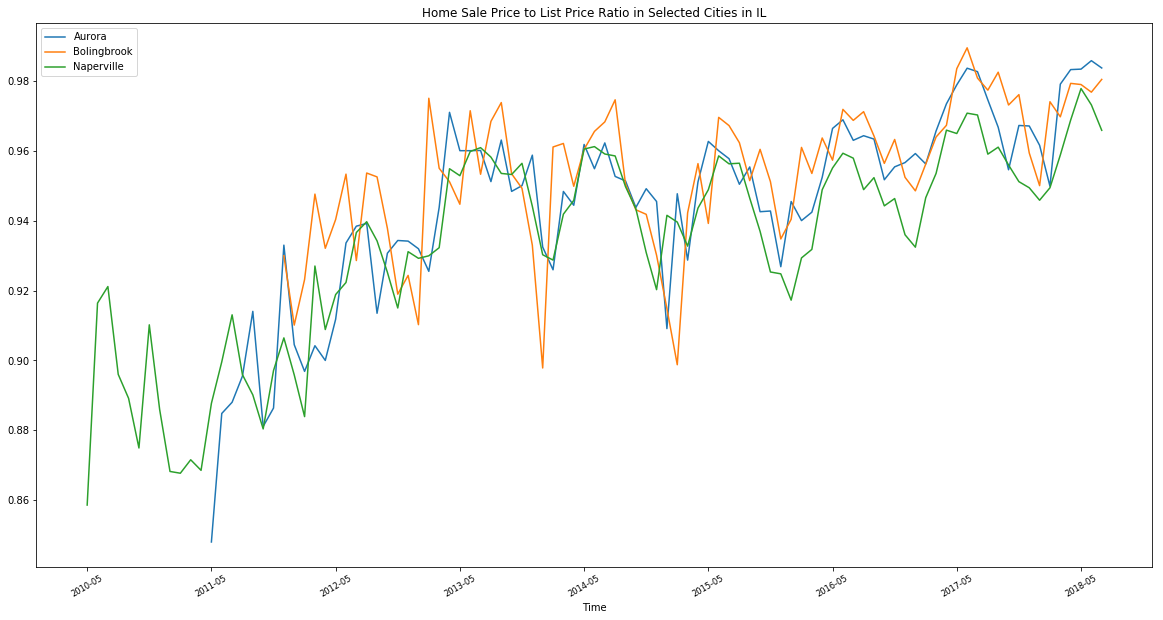

In [40]:
Fig3=plt.figure(figsize=[20,10])
AxeF3=Fig3.add_subplot(1,1,1)

#for x in SP_IL_SelectedRegion_df.index.values:
#    AxeF3.plot(SaleToListRatio_df.iloc[SP_IL_SelectedRegion_df.index.get_loc(x), 26:])

#AxeF3.plot(SaleToListRatio_df.iloc[SP_IL_SelectedRegion_df.index.get_loc('Aurora'), 26:])
#AxeF3.plot(SaleToListRatio_df.iloc[SP_IL_SelectedRegion_df.index.get_loc('Bolingbrook'), 26:])
#AxeF3.plot(SaleToListRatio_df.iloc[SP_IL_SelectedRegion_df.index.get_loc('Naperville'), 26:])

AxeF3.plot(STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Aurora'), 9:])
AxeF3.plot(STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Bolingbrook'), 9:])
AxeF3.plot(STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Naperville'), 9:])

Xtick=['2010-05', '2011-05','2012-05', '2013-05', '2014-05', '2015-05', '2016-05', '2017-05', '2018-05']
AxeF3.set_xticks(Xtick)
AxeF3.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF3.set_xlabel('Time')
AxeF3.set_title('Home Sale Price to List Price Ratio in Selected Cities in IL')
AxeF3.legend()
#plt.subplots_adjust(left=0.2)
plt.show()
Fig3.savefig('SaleToListPriceRatio_SelectedCityIL.png', dpi=400)

In [41]:
STLR_SelectedRegion_df.columns.get_loc('2015-01')

65

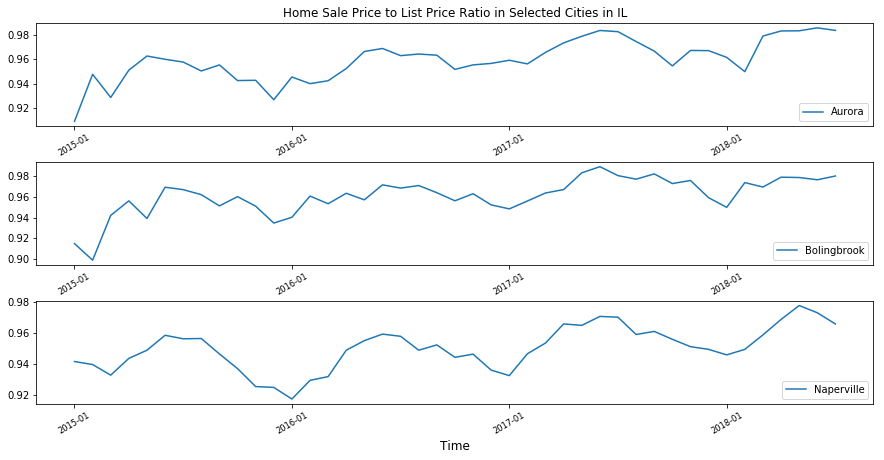

In [42]:
Fig4=plt.figure(figsize=[15,7])
AxeF4s1=Fig4.add_subplot(3,1,1)
AxeF4s2=Fig4.add_subplot(3,1,2)
AxeF4s3=Fig4.add_subplot(3,1,3)
Fig4.subplots_adjust(hspace=0.35)

AxeF4s1.plot(STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Aurora'), 65:])
AxeF4s2.plot(STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Bolingbrook'), 65:])
AxeF4s3.plot(STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Naperville'), 65:])

Xtick=['2015-01', '2016-01', '2017-01', '2018-01']
AxeF4s1.set_xticks(Xtick)
AxeF4s2.set_xticks(Xtick)
AxeF4s3.set_xticks(Xtick)
AxeF4s1.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF4s2.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF4s3.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF4s3.set_xlabel('Time', fontsize='large')
AxeF4s1.set_title('Home Sale Price to List Price Ratio in Selected Cities in IL')
AxeF4s1.legend(loc=4)
AxeF4s2.legend(loc=4)
AxeF4s3.legend(loc=4)
#plt.subplots_adjust(left=0.2)
plt.show()
Fig4.savefig('SaleToListPriceRatio_SelectedCityIL_Magnified.png', dpi=400)

In [43]:
SP_IL_Region_df.head()

,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
Chicago,326000.0,312800.0,292400.0,278300.0,274500.0,269300.0,267100.0,266900.0,259200.0,254400.0,...,273700.0,276600.0,282200.0,285200.0,305100.0,302900.0,300900.0,280300.0,278200.0,273000.0
Aurora,202900.0,207100.0,195600.0,184600.0,165700.0,164400.0,173600.0,181600.0,187600.0,182700.0,...,189700.0,188400.0,184600.0,188200.0,192600.0,193400.0,195200.0,187600.0,184700.0,NaN
Naperville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352100.0,365600.0,364400.0,350700.0,349000.0,355900.0,355500.0,369400.0,381000.0,NaN
Joliet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137600.0,145100.0,158200.0,156000.0,163400.0,153800.0,152700.0,146400.0,147200.0,NaN
Elgin,182700.0,202700.0,201500.0,195900.0,187000.0,183200.0,178200.0,171300.0,164800.0,169700.0,...,184200.0,188900.0,175200.0,177200.0,185300.0,203100.0,197700.0,196700.0,198900.0,NaN


In [44]:
SP_IL_Region_df.columns.get_loc('2015-01')

82

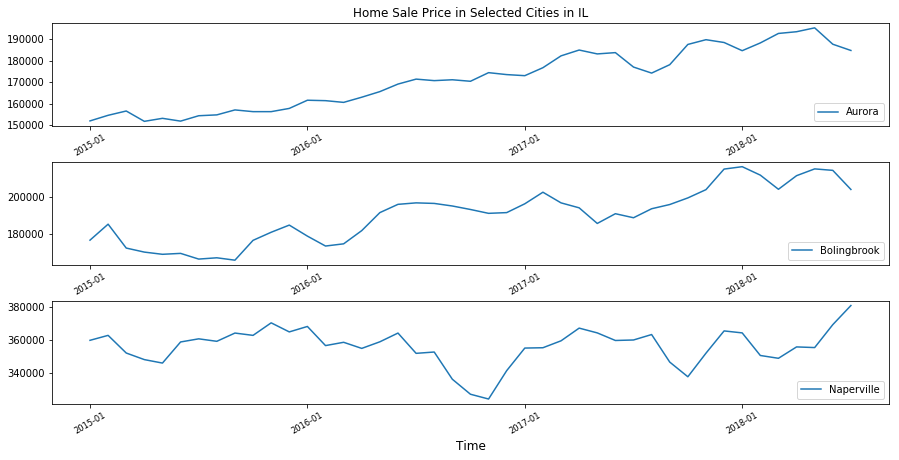

In [45]:
Fig5=plt.figure(figsize=[15,7])
AxeF5s1=Fig5.add_subplot(3,1,1)
AxeF5s2=Fig5.add_subplot(3,1,2)
AxeF5s3=Fig5.add_subplot(3,1,3)
Fig5.subplots_adjust(hspace=0.35)

AxeF5s1.plot(SP_IL_Region_df.iloc[SP_IL_Region_df.index.get_loc('Aurora'), 82:])
AxeF5s2.plot(SP_IL_Region_df.iloc[SP_IL_Region_df.index.get_loc('Bolingbrook'), 82:])
AxeF5s3.plot(SP_IL_Region_df.iloc[SP_IL_Region_df.index.get_loc('Naperville'), 82:])

Xtick=['2015-01', '2016-01', '2017-01', '2018-01']
AxeF5s1.set_xticks(Xtick)
AxeF5s2.set_xticks(Xtick)
AxeF5s3.set_xticks(Xtick)
AxeF5s1.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF5s2.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF5s3.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF5s3.set_xlabel('Time', fontsize='large')
AxeF5s1.set_title('Home Sale Price in Selected Cities in IL')
AxeF5s1.legend(loc=4)
AxeF5s2.legend(loc=4)
AxeF5s3.legend(loc=4)
#plt.subplots_adjust(left=0.2)
plt.show()
Fig5.savefig('SalePrice_SelectedCityIL_Magnified.png', dpi=400)

In [46]:
# Above for Figure 5

In [47]:
StateList=np.unique(SP_df.StateName)
StateList

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Missouri', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin'], dtype=object)

In [48]:
SP_State_df=pd.DataFrame()
for x in StateList:
    SP_Mean=np.mean(SP_df[SP_df.StateName.values==x].iloc[:,4:], axis=0)
    SP_Std=np.std(SP_df[SP_df.StateName.values==x].iloc[:,4:], axis=0)
    SP_Mean_Std=pd.DataFrame({'Mean':SP_Mean, 'Std':SP_Std}, index=SP_Mean.index)
    # Align two datafrom horizontally
    SP_State_df=pd.concat([SP_State_df, SP_Mean_Std], axis=1)
    
    

In [49]:
# Produce for array for naming the multilevel columns of MLP_State_df
State_IndexLv1_list=[]
State_IndexLv2_list=[]
for x in StateList:
    for y in [0,1]:
        State_IndexLv1_list.append(x)
    State_IndexLv2_list.append('Mean')
    State_IndexLv2_list.append('Std')

State_Index_Array=[State_IndexLv1_list, State_IndexLv2_list]

In [50]:
print(State_Index_Array)

[['Alabama', 'Alabama', 'Arizona', 'Arizona', 'Arkansas', 'Arkansas', 'California', 'California', 'Colorado', 'Colorado', 'Connecticut', 'Connecticut', 'Delaware', 'Delaware', 'District of Columbia', 'District of Columbia', 'Florida', 'Florida', 'Georgia', 'Georgia', 'Idaho', 'Idaho', 'Illinois', 'Illinois', 'Indiana', 'Indiana', 'Iowa', 'Iowa', 'Kansas', 'Kansas', 'Kentucky', 'Kentucky', 'Louisiana', 'Louisiana', 'Maryland', 'Maryland', 'Massachusetts', 'Massachusetts', 'Michigan', 'Michigan', 'Minnesota', 'Minnesota', 'Missouri', 'Missouri', 'Nebraska', 'Nebraska', 'Nevada', 'Nevada', 'New Hampshire', 'New Hampshire', 'New Jersey', 'New Jersey', 'New Mexico', 'New Mexico', 'New York', 'New York', 'North Carolina', 'North Carolina', 'Ohio', 'Ohio', 'Oklahoma', 'Oklahoma', 'Oregon', 'Oregon', 'Pennsylvania', 'Pennsylvania', 'Rhode Island', 'Rhode Island', 'South Carolina', 'South Carolina', 'Tennessee', 'Tennessee', 'Texas', 'Texas', 'Utah', 'Utah', 'Virginia', 'Virginia', 'Washington'

In [51]:
# Naming the multilevel columns of MLP_State_df
SP_State_df.columns=State_Index_Array

In [52]:
SP_State_df.head(5)

Alabama                      Arizona                Arkansas  \
                  Mean           Std           Mean           Std      Mean   
2008-03  194757.142857  47412.019487  237441.666667  75817.268903  154400.0   
2008-04  195542.857143  51287.894900  231291.666667  75354.644386  159000.0   
2008-05  190942.857143  54611.481188  224450.000000  74403.371339  159800.0   
2008-06  189914.285714  54710.443729  216612.500000  72552.746976  155850.0   
2008-07  188285.714286  50687.993184  210670.833333  70243.062998  151750.0   

                     California                      Colorado                \
             Std           Mean            Std           Mean           Std   
2008-03  28700.0  474629.255319  215952.032562  223173.913043  87917.932174   
2008-04  31000.0  465412.765957  217193.264381  219069.565217  89342.995321   
2008-05  26100.0  452784.042553  209981.201187  222439.130435  90984.751418   
2008-06  29050.0  442732.978723  217595.787364  217173.913043  82998.628681   
2008-07  28850.0  433290.000000  217577.623789  217265.217391  79489.778444   

          ...         Utah            Virginia                    Washington  \
          ...         Mean  Std           Mean            Std           Mean   
2008-03   ...     299400.0  0.0  356966.666667  177627.807845  323780.000000   
2008-04   ...     314000.0  0.0  348956.410256  170551.685218  320943.333333   
2008-05   ...     305700.0  0.0  335792.307692  150113.111856  315060.000000   
2008-06   ...     299200.0  0.0  325215.384615  134456.365124  313100.000000   
2008-07   ...     301000.0  0.0  324605.128205  137271.355723  309210.000000   

                      West Virginia     Wisconsin           
                  Std          Mean Std      Mean      Std  
2008-03  87622.255164           NaN NaN  207900.0  31800.0  
2008-04  82368.054824           NaN NaN  202650.0  33150.0  
2008-05  79637.003962           NaN NaN  198700.0  26200.0  
2008-06  80839.449940           NaN NaN  190200.0  18700.0  
2008-07  83437.215318           NaN NaN  187000.0  18900.0  

[5 rows x 84 columns]

In [53]:
SP_State_df.index.get_loc('2018-01')

118

In [54]:
SP_State_df.Alabama.Mean.head()

2008-03    194757.142857
2008-04    195542.857143
2008-05    190942.857143
2008-06    189914.285714
2008-07    188285.714286
Name: Mean, dtype: float64

In [55]:
SP_State_df.columns[1]

('Alabama', 'Std')

In [56]:
print(SP_State_df.columns[0])
print(SP_State_df.columns[1])

('Alabama', 'Mean')
('Alabama', 'Std')


In [57]:
('Massachusetts', 'Mean') in SP_State_df.columns

True

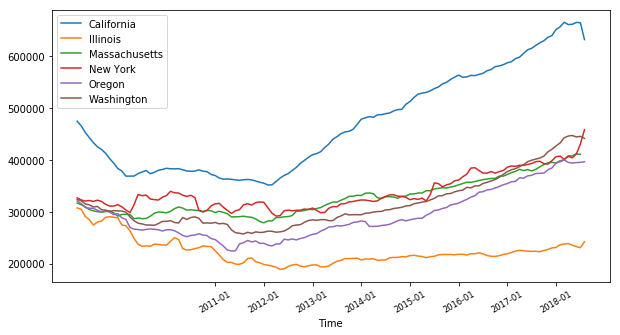

In [58]:
Fig6=plt.figure(figsize=[10,5])
AxeF6=Fig6.add_subplot(1,1,1)

SelectedStateList=['Illinois','New York','California','Massachusetts','Washington','Oregon']
AxeF6LegengLable=[]
Fig6_df=pd.DataFrame()
for x in SP_State_df.columns:
    if x[0] in SelectedStateList and x[1]=='Mean':
        #Fig6_df=pd.concat([Fig6_df, SP_State_df[x]], axis=1, sort='False')
        AxeF6.plot(SP_State_df[x])
        AxeF6LegengLable.append(x[0])

#Fig6_df.iloc[118:].plot.bar(ax=AxeF6, figsize=[10,5])

        
AxeF6xTick=['2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01']
AxeF6.legend(AxeF6LegengLable)
AxeF6.set_xticks(AxeF6xTick)
AxeF6.set_xticklabels(AxeF6xTick, rotation=30, fontsize='small')
AxeF6.set_xlabel('Time')
Fig6.savefig('SalePrice_SelectedState.png')


In [59]:
# Above for Figure 6

In [60]:
Days_df=pd.read_csv('DaysOnZillow_City.csv')

In [61]:
Days_df.index=Days_df.RegionName

In [62]:
Days_df.head(5)

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
New York,1,6181,New York,City,NY,179.5,201.0,206.0,210.5,213.5,...,149.0,152.0,158.0,158.0,167.0,158.0,156.0,125.0,129.5,136.0
Los Angeles,2,12447,Los Angeles,City,CA,117.0,136.5,120.0,111.0,85.0,...,64.0,64.0,67.0,78.0,69.0,54.0,56.5,55.0,56.0,60.0
Chicago,3,17426,Chicago,City,IL,186.0,176.0,180.0,186.0,174.0,...,92.0,92.0,105.0,115.0,133.0,98.0,68.0,76.0,86.0,89.0
Houston,4,39051,Houston,City,TX,145.0,142.0,148.0,125.0,92.0,...,95.0,97.0,89.0,98.0,99.0,83.0,69.0,67.0,71.0,75.0
San Antonio,5,6915,San Antonio,City,TX,100.0,104.0,117.0,114.0,109.0,...,66.0,71.0,76.0,80.0,81.0,60.0,57.0,56.0,56.0,56.0


In [63]:
Days_IL_df=Days_df[Days_df.StateName=='IL']
Days_SelectedRegion_df=Days_IL_df.loc[SelectRegionList]

In [64]:
Days_SelectedRegion_df

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,3,17426,Chicago,City,IL,186.0,176.0,180.0,186.0,174.0,...,92.0,92.0,105.0,115.0,133.0,98.0,68.0,76.0,86.0,89.0
Naperville,183,39931,Naperville,City,IL,NaN,NaN,NaN,NaN,NaN,...,89.0,87.5,108.0,107.5,119.0,110.0,75.0,69.0,75.0,76.0
Aurora,139,10215,Aurora,City,IL,NaN,NaN,NaN,NaN,NaN,...,80.0,81.0,80.0,93.0,111.0,66.0,63.0,63.0,65.0,69.0
Bolingbrook,649,10484,Bolingbrook,City,IL,NaN,NaN,NaN,NaN,NaN,...,77.5,73.0,95.0,119.0,108.0,102.0,67.0,69.0,70.0,76.0
Downers Grove,813,24420,Downers Grove,City,IL,NaN,NaN,NaN,NaN,NaN,...,87.0,97.0,84.0,118.0,121.0,92.0,71.0,77.0,80.0,87.0
Plainfield,419,26534,Plainfield,City,IL,NaN,NaN,NaN,NaN,NaN,...,83.0,86.0,96.0,90.0,105.0,87.5,66.0,64.0,67.0,62.0


In [65]:
STLR_SelectedRegion_df.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,3,17426,Chicago,City,IL,0.901084,0.901442,0.900000,0.892921,0.909091,...,0.959803,0.957388,0.948071,0.947850,0.946182,0.970088,0.974332,0.971848,0.972743,0.968421
Naperville,185,39931,Naperville,City,IL,0.853276,0.881429,0.888889,0.901886,0.858619,...,0.955910,0.951142,0.949392,0.945826,0.949392,0.958751,0.968765,0.977778,0.973107,0.965826
Aurora,141,10215,Aurora,City,IL,NaN,NaN,NaN,NaN,NaN,...,0.954545,0.967213,0.967070,0.961538,0.949845,0.979030,0.983198,0.983333,0.985750,0.983661
Bolingbrook,675,10484,Bolingbrook,City,IL,NaN,NaN,NaN,NaN,NaN,...,0.973070,0.976036,0.959346,0.950000,0.974002,0.969697,0.979257,0.978928,0.976744,0.980392
Downers Grove,848,24420,Downers Grove,City,IL,NaN,NaN,NaN,NaN,NaN,...,0.941424,0.944566,0.950000,0.947520,0.932420,0.950000,0.964187,0.948052,0.960287,0.949272


In [66]:
Days_SelectedRegion_df.columns[65]

'2015-01'

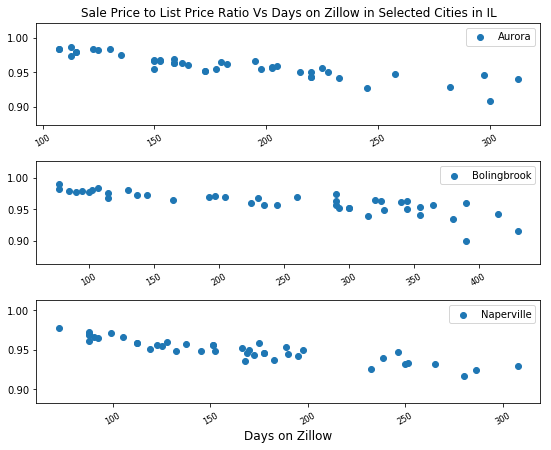

In [67]:
Fig7=plt.figure(figsize=[10,7])
AxeF7s1=Fig7.add_subplot(3,1,1)
AxeF7s2=Fig7.add_subplot(3,1,2)
AxeF7s3=Fig7.add_subplot(3,1,3)
Fig7.subplots_adjust(hspace=0.35)

F7s1x=Days_SelectedRegion_df.iloc[Days_SelectedRegion_df.index.get_loc('Aurora'), 65:].values
F7s1y=STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Aurora'), 65:].values
AxeF7s1.scatter(list(F7s1x), list(F7s1y))
#AxeF7s1=sns.regplot(F7s1x, F7s1y)

F7s2x=Days_SelectedRegion_df.iloc[Days_SelectedRegion_df.index.get_loc('Bolingbrook'), 65:]
F7s2y=STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Bolingbrook'), 65:]
AxeF7s2.scatter(list(F7s2x), list(F7s2y))

F7s3x=Days_SelectedRegion_df.iloc[Days_SelectedRegion_df.index.get_loc('Naperville'), 65:]
F7s3y=STLR_SelectedRegion_df.iloc[STLR_SelectedRegion_df.index.get_loc('Naperville'), 65:]
AxeF7s3.scatter(list(F7s3x), list(F7s3y))

Xtick=['50', '100', '150', '200', '250', '300', '350','400']
#AxeF7s1.set_xticks(Xtick)
#AxeF7s2.set_xticks(Xtick)
#AxeF7s3.set_xticks(Xtick)
AxeF7s1.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF7s2.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF7s3.set_xticklabels(Xtick, rotation=30, fontsize='small')
AxeF7s3.set_xlabel('Days on Zillow', fontsize='large')
AxeF7s1.set_title('Sale Price to List Price Ratio Vs Days on Zillow in Selected Cities in IL')
AxeF7s1.legend(['Aurora'], loc=1)
AxeF7s2.legend(['Bolingbrook'], loc=1)
AxeF7s3.legend(['Naperville'], loc=1)
plt.subplots_adjust(left=0.2)
plt.show()
Fig7.savefig('STLR_Days_SelectedCityIL.png', dpi=400)

In [68]:
FastFood_df=pd.read_csv('FastFoodRestaurants.csv')

In [69]:
FastFood_df.head(3)

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."


In [70]:
FastFood_df=FastFood_df.rename(columns={'province':'state'})

In [71]:
FastFood_df

,address,city,country,keys,latitude,longitude,name,postalCode,state,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
5,4182 Tonya Trl,Hamilton,US,us/oh/hamilton/4182tonyatrl/-1055723171,39.417600,-84.476410,Domino's Pizza,45011,OH,"https://www.dominos.com/en/?redirect=homepage,..."
6,590 S Main St,Englewood,US,us/oh/englewood/590smainst/-1055723171,39.869690,-84.293580,Domino's Pizza,45322,OH,https://www.dominos.com/en/?redirect=homepagea...
7,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.005980,-81.770400,McDonald's,29138,SC,http://www.mcdonalds.com
8,205 W Church St,Batesburg,US,us/sc/batesburg/205wchurchst/-791445730,33.913350,-81.533300,Wendy's,29006,SC,http://www.wendys.com
9,2711 W. Kings Highway Ste. 18,Paragould,US,us/ar/paragould/2711wkingshighwayste18/-66712705,36.061070,-90.523250,Pizza Hut,72450,AR,http://www.pizzahut.com


In [72]:
sorted(np.unique(FastFood_df.name))

['31st Avenue Gyro',
 '7-11',
 '7-Eleven',
 'A & W Family Restaurant',
 'A&W',
 'A&W All American Food',
 'A&W All-American Food',
 'A&W All-American Foods',
 'A&W Restaurant',
 'A&W/Long John Silvers',
 'A&w',
 'A&w Restaurant',
 "AJ's Hotdogs & Gyros",
 "Alice's",
 'Ama Ristorante',
 'Amigos/Kings Classic',
 'Aprisa Mexican Cuisine',
 "Arby's",
 "Arby's Antigo",
 'Arbys',
 'Arctic Circle',
 'Au Bon Pain',
 "Auntie Anne's",
 'Aw Restaurant',
 'B K',
 'B Z Breakfast Burgers Beyond',
 'B. Good',
 'BGR - The Burger Joint',
 "BIG & little's Restaurant",
 'BLIMPIE',
 'Back Yard Burgers',
 'Backyard Burgers',
 'Bad Daddys Burger Bar',
 'Baja Fresh',
 'Baja Fresh Mexican Grill',
 "Baker's Drive Thru",
 'Ball State Lafollette Dining',
 'Bamboo Bistro',
 'Baskin-Robbins',
 'Bb&t',
 "Ben & Jerry's",
 'Bills Place',
 "Blake's LotaBurger",
 "Blake's Lotaburger",
 'Blakes Lotaburger',
 'Blimpie',
 'Blimpie Subs & Sandwiches',
 'Blondies',
 'Bob Evans',
 'Bob Evans Restaurant',
 "Bobby's Burger Pal

In [73]:
FastFood_df.name.nunique()

548

In [74]:
FastFood_df.name = FastFood_df.name.str.replace("'","").str.replace(' ','').str.lower()
FastFood_df.head(10)

,address,city,country,keys,latitude,longitude,name,postalCode,state,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,mcdonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,wendys,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,frischsbigboy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,mcdonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,omg!rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
5,4182 Tonya Trl,Hamilton,US,us/oh/hamilton/4182tonyatrl/-1055723171,39.41760,-84.47641,dominospizza,45011,OH,"https://www.dominos.com/en/?redirect=homepage,..."
6,590 S Main St,Englewood,US,us/oh/englewood/590smainst/-1055723171,39.86969,-84.29358,dominospizza,45322,OH,https://www.dominos.com/en/?redirect=homepagea...
7,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.00598,-81.77040,mcdonalds,29138,SC,http://www.mcdonalds.com
8,205 W Church St,Batesburg,US,us/sc/batesburg/205wchurchst/-791445730,33.91335,-81.53330,wendys,29006,SC,http://www.wendys.com
9,2711 W. Kings Highway Ste. 18,Paragould,US,us/ar/paragould/2711wkingshighwayste18/-66712705,36.06107,-90.52325,pizzahut,72450,AR,http://www.pizzahut.com


In [75]:
FastFoodNameList=sorted(pd.unique(FastFood_df.name))
FastFoodNameList

['31stavenuegyro',
 '7-11',
 '7-eleven',
 'a&w',
 'a&w/longjohnsilvers',
 'a&wall-americanfood',
 'a&wall-americanfoods',
 'a&wallamericanfood',
 'a&wfamilyrestaurant',
 'a&wrestaurant',
 'ajshotdogs&gyros',
 'alices',
 'amaristorante',
 'amigos/kingsclassic',
 'aprisamexicancuisine',
 'arbys',
 'arbysantigo',
 'arcticcircle',
 'aubonpain',
 'auntieannes',
 'awrestaurant',
 'b.good',
 'backyardburgers',
 'baddaddysburgerbar',
 'bajafresh',
 'bajafreshmexicangrill',
 'bakersdrivethru',
 'ballstatelafollettedining',
 'bamboobistro',
 'baskin-robbins',
 'bb&t',
 'ben&jerrys',
 'bgr-theburgerjoint',
 'big&littlesrestaurant',
 'billsplace',
 'bk',
 'blakeslotaburger',
 'blimpie',
 'blimpiesubs&sandwiches',
 'blondies',
 'bobbysburgerpalace',
 'bobevans',
 'bobevansrestaurant',
 'bojanglesfamouschickennbiscuits',
 'bostonchowdacompany',
 'bostonmarket',
 'bostonmarket381',
 'braums',
 'braumsicecream&dairystore',
 'bravotacos',
 'breadeauxpizza',
 'brixtons',
 'budschicken&seafood',
 'burger

In [76]:
FastFoodName_dict={FastFoodNameList[0]:[FastFoodNameList[0]]}
Previous_Name=FastFoodNameList[0]

In [77]:
type(FastFoodName_dict[Previous_Name])

list

In [78]:
FastFoodName_dict={FastFoodNameList[0]:FastFoodNameList[0]}
Previous_Name=FastFoodNameList[0]
for x in np.arange(1,len(FastFoodNameList)):
    if Previous_Name in FastFoodNameList[x]:
        FastFoodName_dict.update({FastFoodNameList[x]:Previous_Name})
    else:
        FastFoodName_dict.update({FastFoodNameList[x]:FastFoodNameList[x]})
        Previous_Name=FastFoodNameList[x]

In [79]:
FastFoodName_dict['7-eleven']='7-11'

In [80]:
for x in FastFood_df.index:
    NewName_str=FastFoodName_dict[FastFood_df.name[x]]
    FastFood_df.iloc[x,FastFood_df.columns.get_loc('name')]=NewName_str

In [81]:
FastFood_df.name.nunique()

416

In [82]:
FastFood_df.name.value_counts().head(5)

mcdonalds     2119
burgerking    1155
tacobell       874
wendys         734
arbys          521
Name: name, dtype: int64

In [83]:
FastFood_df

,address,city,country,keys,latitude,longitude,name,postalCode,state,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,mcdonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,wendys,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,frischsbigboy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,mcdonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,omg!rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."
5,4182 Tonya Trl,Hamilton,US,us/oh/hamilton/4182tonyatrl/-1055723171,39.417600,-84.476410,dominospizza,45011,OH,"https://www.dominos.com/en/?redirect=homepage,..."
6,590 S Main St,Englewood,US,us/oh/englewood/590smainst/-1055723171,39.869690,-84.293580,dominospizza,45322,OH,https://www.dominos.com/en/?redirect=homepagea...
7,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.005980,-81.770400,mcdonalds,29138,SC,http://www.mcdonalds.com
8,205 W Church St,Batesburg,US,us/sc/batesburg/205wchurchst/-791445730,33.913350,-81.533300,wendys,29006,SC,http://www.wendys.com
9,2711 W. Kings Highway Ste. 18,Paragould,US,us/ar/paragould/2711wkingshighwayste18/-66712705,36.061070,-90.523250,pizzahut,72450,AR,http://www.pizzahut.com


In [84]:
FastFood_df.sort_values(by='state').head(3)

,address,city,country,keys,latitude,longitude,name,postalCode,state,websites
1777,59 College Rd Ste 219,Fairbanks,US,us/ak/fairbanks/59collegerdste219/-1055723171,64.840240,-147.710430,dominospizza,99701,AK,"https://www.dominos.com/en/?redirect=homepage,..."
9189,"44332 Sterling Hwy,",Soldotna,US,us/ak/soldotna/44332sterlinghwy/-66712705,60.484690,-151.068600,pizzahut,99669,AK,http://www.pizzahut.com
7469,320 W 5th Ave,Anchorage,US,us/ak/anchorage/320w5thave/93075755,61.217082,-149.887645,arbys,99501,AK,NaN


In [85]:
FastFood_df[FastFood_df.state=='IL']

,address,city,country,keys,latitude,longitude,name,postalCode,state,websites
226,837 W Morton Ave,Jacksonville,US,us/il/jacksonville/837wmortonave/-864103396,39.723201,-90.240464,tacobell,62650,IL,"http://www.tacobell.com,https://locations.taco..."
231,80 Clinton Plz,Clinton,US,us/il/clinton/80clintonplz/-864103396,40.147140,-88.977220,tacobell,61727,IL,"http://www.tacobell.com,https://locations.taco..."
234,201 Maple City Dr,Monmouth,US,us/il/monmouth/201maplecitydr/-864103396,40.910700,-90.644830,tacobell,61462,IL,"http://www.tacobell.com,https://locations.taco..."
237,1212 W Main St,Fairfield,US,us/il/fairfield/1212wmainst/-1161002137,38.379570,-88.376970,mcdonalds,62837,IL,"http://www.mcdonalds.com,http://www.mcdonalds...."
239,550 E Industrial Park Rd,Murphysboro,US,us/il/murphysboro/550eindustrialparkrd/-116100...,37.788390,-89.325240,mcdonalds,62966,IL,"http://mcdonalds.com,http://www.mcdonalds.com/..."
241,1607 S State Route 127,Greenville,US,us/il/greenville/1607sstateroute127/-864103396,38.878660,-89.390770,tacobell,62246,IL,"http://www.tacobell.com,https://locations.taco..."
271,421 N 36th St,Quincy,US,us/il/quincy/421n36thst/-2061630068,39.936340,-91.358810,burgerking,62301,IL,https://locations.bk.com/il/quincy/421-north-3...
370,700 N Webster St,Taylorville,US,us/il/taylorville/700nwebsterst/-791445730,39.556460,-89.296860,wendys,62568,IL,http://www.wendys.com
371,610 N Webster St,Taylorville,US,us/il/taylorville/610nwebsterst/-864103396,39.555018,-89.297434,tacobell,62568,IL,"http://www.tacobell.com,https://locations.taco..."
372,510 N Webster St,Taylorville,US,us/il/taylorville/510nwebsterst/106088,39.554200,-89.297000,kfc,62568,IL,http://www.kfc.com


In [86]:
NumberName_StateCity_dict={}

for x in FastFood_df.state.unique():
    FastFood_City_dict={}
    for y in FastFood_df.city[FastFood_df.state==x].unique():
        FastFood_State_df=FastFood_df[FastFood_df.state==x]
        FastFood_City_dict.update({y:FastFood_State_df[FastFood_State_df.city==y].name.nunique()})
    NumberName_StateCity_dict.update({x:FastFood_City_dict})
        

In [87]:
NumberName_StateCity_dict

{'NY': {'Massena': 2,
  'Auburn': 2,
  'Bronx': 8,
  'Garden City': 1,
  'Endicott': 2,
  'Seneca Falls': 1,
  'Malone': 1,
  'Cobleskill': 2,
  'Ogdensburg': 1,
  'New York': 11,
  'Painted Post': 2,
  'Albany': 3,
  'Canton': 1,
  'Plattsburgh': 5,
  'Depew': 1,
  'Buffalo': 2,
  'Owego': 3,
  'Binghamton': 3,
  'Vestal': 2,
  'Troy': 1,
  'Evans Mills': 1,
  'Syracuse': 1,
  'Fulton': 1,
  'Oneida': 5,
  'Baldwinsville': 1,
  'Rochester': 5,
  'Avon': 1,
  'Rome': 5,
  'Whitesboro': 1,
  'Utica': 3,
  'Warwick': 1,
  'Cairo': 1,
  'Cicero': 1,
  'Shirley': 1,
  'Valley Stream': 1,
  'Lockport': 1,
  'Oneonta': 4,
  'Oswego': 2,
  'Delhi': 1,
  'Monticello': 1,
  'Norwich': 1,
  'Oceanside': 1,
  'Niagara Falls': 1,
  'Port Washington': 1,
  'Port Jefferson Station': 1,
  'Wading River': 1,
  'Saratoga Springs': 1,
  'Potsdam': 2,
  'Salamanca': 2,
  'Watertown': 1,
  'Kingston': 2,
  'Hamilton': 1,
  'Saint James': 1,
  'Camillus': 1,
  'Huntington': 1,
  'Liberty': 1,
  'South Ozon

In [88]:
NumberName_StateCity_df=pd.DataFrame(NumberName_StateCity_dict)
NumberName_StateCity_df.head(5)

,NY,OH,KY,SC,AR,OK,IN,NC,TN,TX,...,NJ,MA,MD,CO,NH,CT,AK,DE,DC,Co Spgs
Abbeville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aberdeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abilene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abingdon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
NumberName_StateCity_df.IL.dropna().head()

Addison      3.0
Aledo        1.0
Algonquin    2.0
Alsip        1.0
Alton        2.0
Name: IL, dtype: float64

In [90]:
MLP_df.columns

Index(['RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', '2010-01',
       '2010-02', '2010-03', '2010-04', '2010-05',
       ...
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '2018-05', '2018-06', '2018-07', '2018-08'],
      dtype='object', length=109)

In [91]:
def GetColLoc(A_df, A_str):
    return A_df.columns.get_loc(A_str)

def GetIndexLoc(A_df, A_str):
    return A_df.index.get_loc(A_str)


def Call_SP_Latest():
    return SP_df.iloc[:,[GetColLoc(SP_df, 'StateName'), GetColLoc(SP_df, 'RegionName') ,SP_df.columns.get_loc(SP_df.columns[-1])]]

def Call_MLP_Latest():
    return MLP_df.iloc[:,[GetColLoc(MLP_df, 'State'), GetColLoc(MLP_df, 'RegionName') ,MLP_df.columns.get_loc(MLP_df.columns[-1])]]

In [92]:
Call_SP_Latest().head(10)

,StateName,RegionName,2018-08
0,New York,New York,567100.0
1,California,Los Angeles,699600.0
2,Illinois,Chicago,273000.0
3,Texas,San Antonio,NaN
4,Pennsylvania,Philadelphia,NaN
5,Arizona,Phoenix,241300.0
6,Nevada,Las Vegas,NaN
7,California,San Diego,587900.0
8,Texas,Dallas,NaN
9,California,San Jose,1011600.0


In [93]:
Call_SP_Latest().dropna(how='any').head(10)

,StateName,RegionName,2018-08
0,New York,New York,567100.0
1,California,Los Angeles,699600.0
2,Illinois,Chicago,273000.0
5,Arizona,Phoenix,241300.0
7,California,San Diego,587900.0
9,California,San Jose,1011600.0
11,Florida,Jacksonville,160600.0
14,Ohio,Columbus,150400.0
18,Colorado,Denver,408500.0
19,Washington,Seattle,685900.0


In [94]:
def ReadStateAbbreList():
    StateAbbreviation_dict={}
    StateAbbreviation_df=pd.read_csv('StateAbbreviationList.csv', )
    for x in StateAbbreviation_df.State.unique():
        StateAbbreviation_dict.update({x:list(StateAbbreviation_df[StateAbbreviation_df.State==x].Abbreviation.values)})
    return StateAbbreviation_dict

def StateAbbreviationSwitch(A_str):
    StateAbbreviation_dict=ReadStateAbbreList()
    Output_str=StateAbbreviation_dict[A_str]
    return Output_str[0]
    

In [95]:
StateAbbreviationSwitch('District of Columbia')

'DC'

In [96]:
SP_Latest_df=Call_SP_Latest().dropna(how='any')

# Change the state name to abbreviation
for x in SP_Latest_df.index:
    State_Abbre=StateAbbreviationSwitch(SP_Latest_df.StateName[x])
    SP_Latest_df.iloc[GetIndexLoc(SP_Latest_df, x), GetColLoc(SP_Latest_df,'StateName')]=State_Abbre
    


In [97]:
SP_Latest_df.head(2)

,StateName,RegionName,2018-08
0,NY,New York,567100.0
1,CA,Los Angeles,699600.0


In [98]:
MLP_Latest_df=Call_MLP_Latest().dropna(how='any')

In [99]:
MLP_Latest_df.head(2)

,State,RegionName,2018-08
0,NY,New York,799999.0
1,CA,Los Angeles,799000.0


In [100]:
SP_Latest_df[SP_Latest_df.StateName=='IL'].head()

,StateName,RegionName,2018-08
2,IL,Chicago,273000.0
312,IL,Waukegan,123100.0
326,IL,Cicero,172000.0
355,IL,Arlington Heights,294600.0
390,IL,Evanston,318300.0


In [101]:
NumberName_StateCity_df.IL.dropna().head()

Addison      3.0
Aledo        1.0
Algonquin    2.0
Alsip        1.0
Alton        2.0
Name: IL, dtype: float64

In [102]:
pd.DataFrame(NumberName_StateCity_df.IL.dropna().head(3))

,IL
Addison,3.0
Aledo,1.0
Algonquin,2.0


In [103]:
pd.DataFrame(NumberName_StateCity_df.IL.dropna()).reset_index().head(3)

,index,IL
0,Addison,3.0
1,Aledo,1.0
2,Algonquin,2.0


In [104]:
pd.DataFrame(NumberName_StateCity_df.IL.dropna()).reset_index().rename(columns={'index':'RegionName'}).head(3)

,RegionName,IL
0,Addison,3.0
1,Aledo,1.0
2,Algonquin,2.0


In [105]:
SP_FastFood_IL_df=pd.merge(SP_Latest_df[SP_Latest_df.StateName=='IL'], 
                           pd.DataFrame(NumberName_StateCity_df.IL.dropna())
                           .reset_index().rename(columns={'index':'RegionName'}), how='left', on='RegionName')

SP_FastFood_IL_df=SP_FastFood_IL_df.dropna(how='any')
SP_FastFood_IL_df=SP_FastFood_IL_df.rename(columns={'IL':'NumberFastFoodBrand'})

In [106]:
SP_FastFood_IL_df.head(3)

,StateName,RegionName,2018-08,NumberFastFoodBrand
0,IL,Chicago,273000.0,19.0
1,IL,Waukegan,123100.0,2.0
3,IL,Arlington Heights,294600.0,1.0


In [107]:
SP_FastFood_IL_df.describe()

,2018-08,NumberFastFoodBrand
count,33.000000,33.000000
mean,244875.757576,2.090909
std,84304.096247,3.126136
min,117700.000000,1.000000
25%,189200.000000,1.000000
50%,228300.000000,1.000000
75%,294600.000000,2.000000
max,468700.000000,19.000000


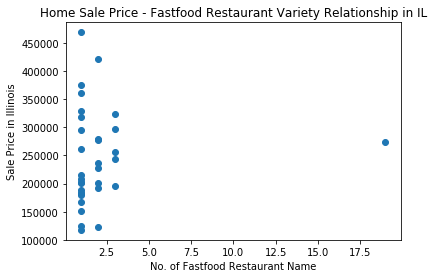

In [108]:
Fig8=plt.figure()
AxeF8=Fig8.add_subplot(1,1,1)

AxeF8.scatter(SP_FastFood_IL_df.NumberFastFoodBrand, SP_FastFood_IL_df['2018-08'])
AxeF8.set_xlabel('No. of Fastfood Restaurant Name')
AxeF8.set_ylabel('Sale Price in Illinois')
AxeF8.set_title('Home Sale Price - Fastfood Restaurant Variety Relationship in IL')
Fig8.savefig('Sale_Price_Fastfood_Relation_IL')

In [109]:
SP_FastFood_City_df=pd.DataFrame()
#TestList=SP_Latest_df.StateName.unique()
#TestList=TestList[0:3]
for x in SP_Latest_df.StateName.unique():
#for x in TestList:
    SP_FastFood_State_df=pd.merge(SP_Latest_df[SP_Latest_df.StateName==x], 
                           pd.DataFrame(NumberName_StateCity_df[x].dropna())
                           .reset_index().rename(columns={'index':'RegionName'}), how='left', on='RegionName')
    SP_FastFood_State_df=SP_FastFood_State_df.dropna(how='any')
    SP_FastFood_State_df=SP_FastFood_State_df.rename(columns={x:'NumberFastFoodBrand'})
    SP_FastFood_City_df=SP_FastFood_City_df.append(SP_FastFood_State_df)
    #pd.merge(SP_FastFood_City_df, SP_FastFood_State_df, how="inner", o)

SP_FastFood_City_df=SP_FastFood_City_df.reset_index().drop(columns=['index'])

SP_FastFood_City_df.head()

,StateName,RegionName,2018-08,NumberFastFoodBrand
0,NY,New York,567100.0,11.0
1,NY,New Rochelle,645600.0,1.0
2,NY,Mount Vernon,412500.0,1.0
3,CA,Los Angeles,699600.0,15.0
4,CA,San Diego,587900.0,11.0


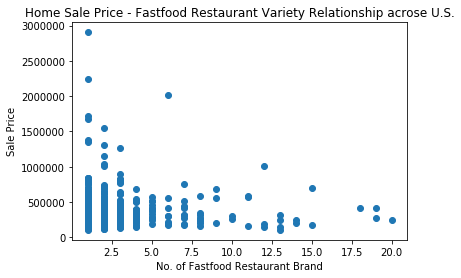

In [110]:
Fig9=plt.figure()
AxeF9=Fig9.add_subplot(1,1,1)

AxeF9.scatter(SP_FastFood_City_df.NumberFastFoodBrand, SP_FastFood_City_df['2018-08'])
AxeF9.set_xlabel('No. of Fastfood Restaurant Brand')
AxeF9.set_ylabel('Sale Price')
AxeF9.set_title('Home Sale Price - Fastfood Restaurant Variety Relationship acrose U.S.')
Fig9.savefig('Sale_Price_Fastfood_Relation_USA')

In [111]:
MLP_Latest_df.head()

,State,RegionName,2018-08
0,NY,New York,799999.0
1,CA,Los Angeles,799000.0
2,IL,Chicago,319900.0
3,TX,Houston,324187.0
4,PA,Philadelphia,215000.0


In [112]:
MLP_FastFood_City_df=pd.DataFrame()
for x in MLP_Latest_df.State.unique():
    MLP_FastFood_State_df=pd.merge(MLP_Latest_df[MLP_Latest_df.State==x], 
                           pd.DataFrame(NumberName_StateCity_df[x].dropna())
                           .reset_index().rename(columns={'index':'RegionName'}), how='left', on='RegionName')
    MLP_FastFood_State_df=MLP_FastFood_State_df.dropna(how='any')
    MLP_FastFood_State_df=MLP_FastFood_State_df.rename(columns={x:'NumberFastFoodBrand'})
    MLP_FastFood_City_df=MLP_FastFood_City_df.append(MLP_FastFood_State_df)
    
MLP_FastFood_City_df=MLP_FastFood_City_df.reset_index().drop(columns=['index'])

MLP_FastFood_City_df.head()

,State,RegionName,2018-08,NumberFastFoodBrand
0,NY,New York,799999.0,11.0
1,NY,Buffalo,99888.0,2.0
2,NY,Rochester,72900.0,5.0
3,NY,Syracuse,87900.0,1.0
4,NY,Albany,174900.0,3.0


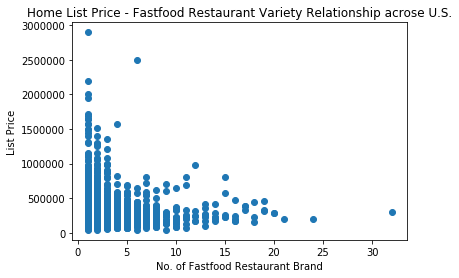

In [113]:
Fig10=plt.figure()
AxeF10=Fig10.add_subplot(1,1,1)

AxeF10.scatter(MLP_FastFood_City_df.NumberFastFoodBrand, MLP_FastFood_City_df['2018-08'])
AxeF10.set_xlabel('No. of Fastfood Restaurant Brand')
AxeF10.set_ylabel('List Price')
AxeF10.set_title('Home List Price - Fastfood Restaurant Variety Relationship acrose U.S.')
Fig10.savefig('List_Price_Fastfood_Relation_USA')

In [114]:
#FastFoodNoBin=['0-3','4-6','7-9','10-12','13-15','16-18','19-21','22-24','25-27','28-30','31-33']
#FastFoodNoGp=pd.cut(np.array(MLP_FastFood_City_df.NumberFastFoodBrand), [0,3,6,9,12,15,18,21,24,27,30,33], 
                    #labels=FastFoodNoBin, right=True)

FastFoodNoBin=['0-5','6-10','11-15','16-20','21-25','26-30','31-35']
FastFoodNoGp=pd.cut(np.array(MLP_FastFood_City_df.NumberFastFoodBrand), [0,5,10,15,20,25,30,35], labels=FastFoodNoBin, right=True)

In [115]:
GroupBin_df=pd.DataFrame(pd.Series(FastFoodNoGp), MLP_FastFood_City_df.index, columns=['GroupBin'])

In [116]:
MLP_FastFood_City_df=pd.concat([MLP_FastFood_City_df, GroupBin_df], axis=1)
MLP_FastFood_City_df.head()

,State,RegionName,2018-08,NumberFastFoodBrand,GroupBin
0,NY,New York,799999.0,11.0,11-15
1,NY,Buffalo,99888.0,2.0,0-5
2,NY,Rochester,72900.0,5.0,0-5
3,NY,Syracuse,87900.0,1.0,0-5
4,NY,Albany,174900.0,3.0,0-5


In [117]:
MLP_FastFoodBin_City_df=MLP_FastFood_City_df.groupby(by='GroupBin')

In [118]:
MLP_FastFoodBin_City_df.groups

{'0-5': Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2458],
            dtype='int64', length=2184),
 '6-10': Int64Index([  56,   57,   59,   60,   78,   79,   84,   91,  144,  176,
             ...
             2340, 2377, 2404, 2405, 2409, 2412, 2422, 2426, 2431, 2457],
            dtype='int64', length=222),
 '11-15': Int64Index([   0,   51,   52,   53,  398,  554,  603,  643,  653,  655,  659,
              902,  907,  909, 1021, 1023, 1087, 1354, 1390, 1391, 1484, 1519,
             1558, 1565, 1566, 1633, 1819, 1820, 1853, 1968, 2158, 2225, 2230,
             2326],
            dtype='int64'),
 '16-20': Int64Index([ 266,  394,  395,  396,  397,  601,  654,  657,  763, 1352, 1440,
             1533, 1559, 1716, 1935, 2172],
            dtype='int64'),
 '21-25': Int64Index([904, 1483], dtype='int64'),
 '26-30': Int64Index([], dtype='int64'),
 '31-35': Int64Index([640], dty

In [119]:
for x in MLP_FastFoodBin_City_df:
    print(x)

('0-5',      State              RegionName    2018-08  NumberFastFoodBrand GroupBin
1       NY                 Buffalo    99888.0                  2.0      0-5
2       NY               Rochester    72900.0                  5.0      0-5
3       NY                Syracuse    87900.0                  1.0      0-5
4       NY                  Albany   174900.0                  3.0      0-5
5       NY            New Rochelle   585000.0                  1.0      0-5
6       NY                   Utica   123450.0                  3.0      0-5
7       NY           Valley Stream   492500.0                  1.0      0-5
8       NY                    Troy   146250.0                  1.0      0-5
9       NY           Niagara Falls    79900.0                  1.0      0-5
10      NY              Binghamton    99900.0                  3.0      0-5
11      NY               Patchogue   349000.0                  1.0      0-5
12      NY               Tonawanda   145000.0                  1.0      0-5
13  

In [120]:
for name, group in MLP_FastFoodBin_City_df:
    print(name)

0-5
6-10
11-15
16-20
21-25
26-30
31-35


In [121]:
for name, group in MLP_FastFoodBin_City_df:
    print(group)

     State              RegionName    2018-08  NumberFastFoodBrand GroupBin
1       NY                 Buffalo    99888.0                  2.0      0-5
2       NY               Rochester    72900.0                  5.0      0-5
3       NY                Syracuse    87900.0                  1.0      0-5
4       NY                  Albany   174900.0                  3.0      0-5
5       NY            New Rochelle   585000.0                  1.0      0-5
6       NY                   Utica   123450.0                  3.0      0-5
7       NY           Valley Stream   492500.0                  1.0      0-5
8       NY                    Troy   146250.0                  1.0      0-5
9       NY           Niagara Falls    79900.0                  1.0      0-5
10      NY              Binghamton    99900.0                  3.0      0-5
11      NY               Patchogue   349000.0                  1.0      0-5
12      NY               Tonawanda   145000.0                  1.0      0-5
13      NY  

In [122]:
MLP_FastFoodBin_City_df.get_group('0-5').describe()

,2018-08,NumberFastFoodBrand
count,2.184000e+03,2184.000000
mean,2.890736e+05,1.956044
std,2.193640e+05,1.210691
min,3.990000e+04,1.000000
25%,1.624375e+05,1.000000
50%,2.344500e+05,1.000000
75%,3.399925e+05,3.000000
max,2.897500e+06,5.000000


In [123]:
for name, group in MLP_FastFoodBin_City_df:
    print(group.describe().loc['mean','2018-08'])

289073.6121794872
248481.6418918919
312788.35294117645
302378.53125
196750.0
nan
305000.0


In [124]:
FastFoodBinTable_df=pd.DataFrame()
for name, group in MLP_FastFoodBin_City_df:
    FastFoodBinTable_df=pd.concat([FastFoodBinTable_df, pd.DataFrame({name:group['2018-08']}).reset_index().drop(columns=['index'])], axis=1)

In [125]:
FastFoodBinTable_df.head()

,0-5,6-10,11-15,16-20,21-25,26-30,31-35
0,99888.0,325000.0,799999.0,319900.0,199000.0,NaN,305000.0
1,72900.0,598800.0,799000.0,324187.0,194500.0,NaN,NaN
2,87900.0,610000.0,689000.0,236000.0,NaN,NaN,NaN
3,174900.0,539999.5,980000.0,385000.0,NaN,NaN,NaN
4,585000.0,295000.0,254900.0,388945.0,NaN,NaN,NaN


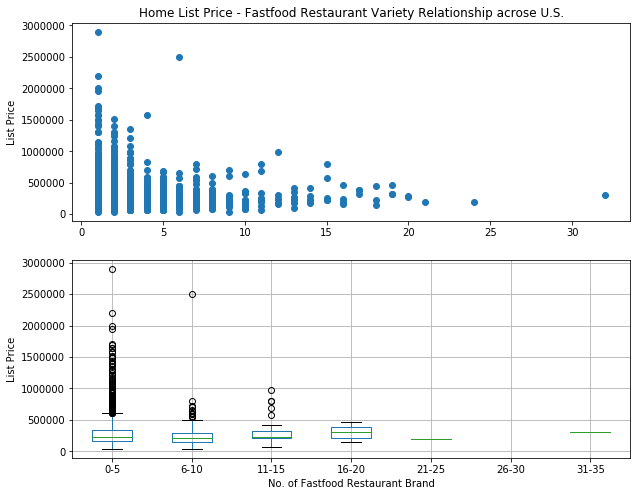

In [126]:
Fig11=plt.figure(figsize=[10,8])
AxeF11s1=Fig11.add_subplot(2,1,1)
AxeF11s2=Fig11.add_subplot(2,1,2)

AxeF11s1.scatter(MLP_FastFood_City_df.NumberFastFoodBrand, MLP_FastFood_City_df['2018-08'])
AxeF11s1.set_ylabel('List Price')
AxeF11s1.set_title('Home List Price - Fastfood Restaurant Variety Relationship acrose U.S.')

AxeF11s2=FastFoodBinTable_df.boxplot()
AxeF11s2.set_xlabel('No. of Fastfood Restaurant Brand')
AxeF11s2.set_ylabel('List Price')

Fig11.savefig('List_Price_Fastfood_Relation_USA_2')

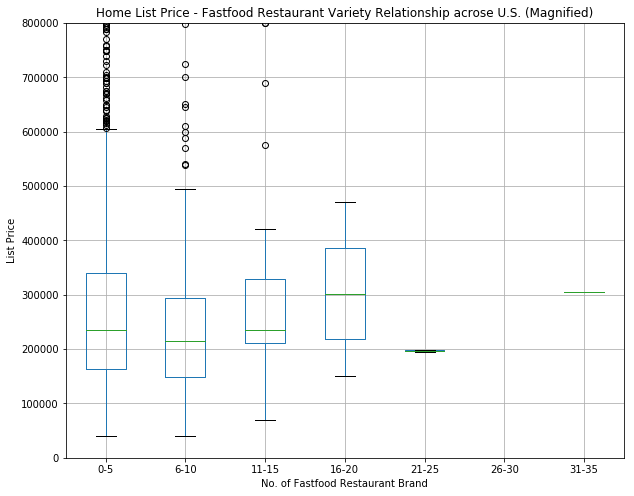

In [127]:
Fig12=plt.figure(figsize=[10,8])
AxeF12=Fig12.add_subplot(1,1,1)

AxeF12=FastFoodBinTable_df.boxplot()
AxeF12.set_xlabel('No. of Fastfood Restaurant Brand')
AxeF12.set_ylabel('List Price')
AxeF12.set_ylim([0, 800000])
AxeF12.set_title('Home List Price - Fastfood Restaurant Variety Relationship acrose U.S. (Magnified)')
Fig12.savefig('List_Price_Fastfood_Relation_USA_2_Mag')

In [128]:
#FastFoodNoBin_SP=['0-3','4-6','7-9','10-12','13-15','16-18','19-21','22-24','25-27','28-30','31-33']
#FastFoodNoGp_SP=pd.cut(np.array(SP_FastFood_City_df.NumberFastFoodBrand), [0,3,6,9,12,15,18,21,24,27,30,33], labels=FastFoodNoBin, right=True)

FastFoodNoBin_SP=['0-5','6-10','11-15','16-20','21-25','26-30','31-35']
FastFoodNoGp_SP=pd.cut(np.array(SP_FastFood_City_df.NumberFastFoodBrand), [0,5,10,15,20,25,30,35], labels=FastFoodNoBin, right=True)

GroupBin_SP_df=pd.DataFrame(pd.Series(FastFoodNoGp_SP), SP_FastFood_City_df.index, columns=['GroupBin'])
SP_FastFood_City_df=pd.concat([SP_FastFood_City_df, GroupBin_SP_df], axis=1)
FastFoodBin_SP_City_df=SP_FastFood_City_df.groupby(by='GroupBin')

FastFoodBinTable_SP_df=pd.DataFrame()
for name, group in FastFoodBin_SP_City_df:
    FastFoodBinTable_SP_df=pd.concat([FastFoodBinTable_SP_df, pd.DataFrame({name:group['2018-08']}).reset_index().drop(columns=['index'])], axis=1)

FastFoodBinTable_SP_df.head()

,0-5,6-10,11-15,16-20,21-25,26-30,31-35
0,645600.0,307100.0,567100.0,273000.0,NaN,NaN,NaN
1,412500.0,553800.0,699600.0,241300.0,NaN,NaN,NaN
2,250200.0,580200.0,587900.0,408500.0,NaN,NaN,NaN
3,389900.0,516900.0,1011600.0,410200.0,NaN,NaN,NaN
4,242200.0,274500.0,247700.0,NaN,NaN,NaN,NaN


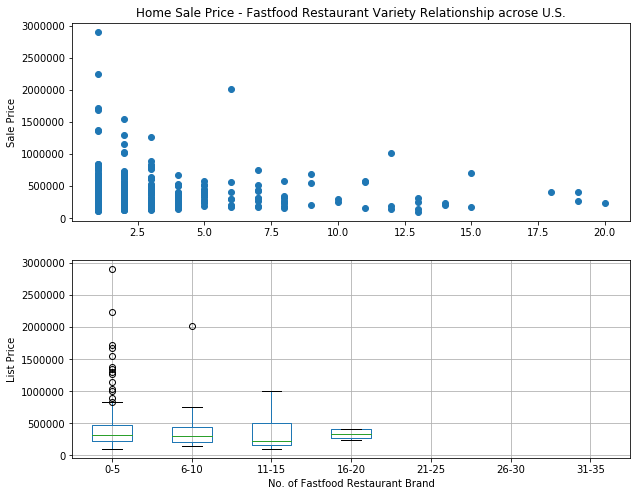

In [129]:
Fig13=plt.figure(figsize=[10,8])
AxeF13s1=Fig13.add_subplot(2,1,1)
AxeF13s2=Fig13.add_subplot(2,1,2)

AxeF13s1.scatter(SP_FastFood_City_df.NumberFastFoodBrand, SP_FastFood_City_df['2018-08'])
AxeF13s1.set_ylabel('Sale Price')
AxeF13s1.set_title('Home Sale Price - Fastfood Restaurant Variety Relationship acrose U.S.')

AxeF13s2=FastFoodBinTable_SP_df.boxplot()
AxeF13s2.set_xlabel('No. of Fastfood Restaurant Brand')
AxeF13s2.set_ylabel('List Price')

Fig13.savefig('Sale_Price_Fastfood_Relation_USA_2')

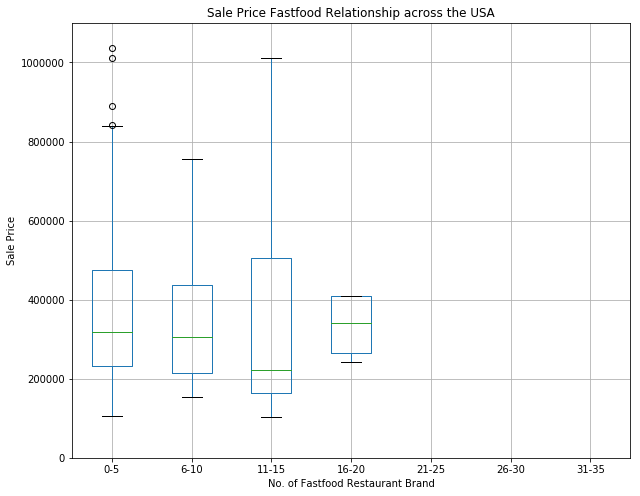

In [130]:
Fig14=plt.figure(figsize=[10,8])
AxeF14=Fig14.add_subplot(1,1,1)
AxeF14=FastFoodBinTable_SP_df.boxplot()
AxeF14.set_ylim([0,1100000])
AxeF14.set_xlabel('No. of Fastfood Restaurant Brand')
AxeF14.set_ylabel('Sale Price')
AxeF14.set_title('Sale Price Fastfood Relationship across the USA')

Fig14.savefig('Sale_Price_Fastfood_Relation_USA_2_Mag')



In [209]:
Income_df=pd.read_csv('Affordability_Income_2018Q2.csv')
Income_df.head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06
0,102001,United States,0,16347.78,16670.31,17005.00,17340.92,17731.96,18018.92,18291.96,...,57002.41,57421.69,57814.98,58228.92,58648.777199,59068.634397,59488.491596,59908.348794,60328.205993,60748.063192
1,394913,"New York, NY",1,17537.06,17882.32,18246.90,18628.91,19096.50,19499.66,19871.00,...,71063.48,71708.03,72232.60,72584.58,73071.875840,73559.171681,74046.467521,74533.763361,75021.059201,75508.355042
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,17915.63,18279.35,18733.76,19230.16,19819.58,20321.11,20702.53,...,65029.85,65747.37,66275.43,66748.53,67352.566968,67956.603935,68560.640903,69164.677870,69768.714838,70372.751806
3,394463,"Chicago, IL",3,20060.12,20455.89,20900.13,21277.76,21702.38,21852.68,21946.23,...,65223.13,65781.94,66274.25,66800.84,67222.934643,67645.029285,68067.123928,68489.218570,68911.313213,69333.407855
4,394514,"Dallas-Fort Worth, TX",4,18151.53,18456.96,18887.64,19463.93,20092.82,20605.59,20967.85,...,62976.98,63495.44,64100.72,64675.29,65120.765254,65566.240509,66011.715763,66457.191018,66902.666272,67348.141527


In [210]:
Income_df=Income_df.drop(index=[0]).reset_index().drop(columns=['index'])  # Need to update index after drop rows
Income_df.head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06
0,394913,"New York, NY",1,17537.06,17882.32,18246.90,18628.91,19096.50,19499.66,19871.00,...,71063.48,71708.03,72232.60,72584.58,73071.875840,73559.171681,74046.467521,74533.763361,75021.059201,75508.355042
1,753899,"Los Angeles-Long Beach-Anaheim, CA",2,17915.63,18279.35,18733.76,19230.16,19819.58,20321.11,20702.53,...,65029.85,65747.37,66275.43,66748.53,67352.566968,67956.603935,68560.640903,69164.677870,69768.714838,70372.751806
2,394463,"Chicago, IL",3,20060.12,20455.89,20900.13,21277.76,21702.38,21852.68,21946.23,...,65223.13,65781.94,66274.25,66800.84,67222.934643,67645.029285,68067.123928,68489.218570,68911.313213,69333.407855
3,394514,"Dallas-Fort Worth, TX",4,18151.53,18456.96,18887.64,19463.93,20092.82,20605.59,20967.85,...,62976.98,63495.44,64100.72,64675.29,65120.765254,65566.240509,66011.715763,66457.191018,66902.666272,67348.141527
4,394974,"Philadelphia, PA",5,17532.09,17865.76,18239.94,18600.71,19084.72,19429.86,19715.93,...,65423.97,65765.67,66143.38,66650.84,67098.299737,67545.759474,67993.219211,68440.678948,68888.138685,69335.598423


In [211]:
Income_df=pd.concat([pd.DataFrame(list(Income_df.RegionName.str.split(', ')), columns=['Region','State']), Income_df] 
                    , axis=1).drop(columns=['RegionID','RegionName'])
Income_df.head()

,Region,State,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06
0,New York,NY,1,17537.06,17882.32,18246.90,18628.91,19096.50,19499.66,19871.00,...,71063.48,71708.03,72232.60,72584.58,73071.875840,73559.171681,74046.467521,74533.763361,75021.059201,75508.355042
1,Los Angeles-Long Beach-Anaheim,CA,2,17915.63,18279.35,18733.76,19230.16,19819.58,20321.11,20702.53,...,65029.85,65747.37,66275.43,66748.53,67352.566968,67956.603935,68560.640903,69164.677870,69768.714838,70372.751806
2,Chicago,IL,3,20060.12,20455.89,20900.13,21277.76,21702.38,21852.68,21946.23,...,65223.13,65781.94,66274.25,66800.84,67222.934643,67645.029285,68067.123928,68489.218570,68911.313213,69333.407855
3,Dallas-Fort Worth,TX,4,18151.53,18456.96,18887.64,19463.93,20092.82,20605.59,20967.85,...,62976.98,63495.44,64100.72,64675.29,65120.765254,65566.240509,66011.715763,66457.191018,66902.666272,67348.141527
4,Philadelphia,PA,5,17532.09,17865.76,18239.94,18600.71,19084.72,19429.86,19715.93,...,65423.97,65765.67,66143.38,66650.84,67098.299737,67545.759474,67993.219211,68440.678948,68888.138685,69335.598423


In [220]:
Income_df=Income_df.rename(columns={'Region':'RegionName'})

In [221]:
Income_df.head()

,RegionName,State,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06
0,New York,NY,1,17537.06,17882.32,18246.90,18628.91,19096.50,19499.66,19871.00,...,71063.48,71708.03,72232.60,72584.58,73071.875840,73559.171681,74046.467521,74533.763361,75021.059201,75508.355042
1,Los Angeles-Long Beach-Anaheim,CA,2,17915.63,18279.35,18733.76,19230.16,19819.58,20321.11,20702.53,...,65029.85,65747.37,66275.43,66748.53,67352.566968,67956.603935,68560.640903,69164.677870,69768.714838,70372.751806
2,Chicago,IL,3,20060.12,20455.89,20900.13,21277.76,21702.38,21852.68,21946.23,...,65223.13,65781.94,66274.25,66800.84,67222.934643,67645.029285,68067.123928,68489.218570,68911.313213,69333.407855
3,Dallas-Fort Worth,TX,4,18151.53,18456.96,18887.64,19463.93,20092.82,20605.59,20967.85,...,62976.98,63495.44,64100.72,64675.29,65120.765254,65566.240509,66011.715763,66457.191018,66902.666272,67348.141527
4,Philadelphia,PA,5,17532.09,17865.76,18239.94,18600.71,19084.72,19429.86,19715.93,...,65423.97,65765.67,66143.38,66650.84,67098.299737,67545.759474,67993.219211,68440.678948,68888.138685,69335.598423


In [222]:
Income201806_df=Income_df.iloc[:,[0,1,2,-1]]

In [223]:
Income201806_Mean_Stata_df=Income201806_df.groupby(by='State').mean().drop(columns=['SizeRank'])
Income201806_Mean_Stata_df.head()

,2018-06
State,
AK,85427.011549
AL,49689.784446
AR,46770.798394
AZ,52075.582492
CA,67870.875029


In [224]:
Income_Mean_Stata_df=Income_df.groupby(by='State').mean().drop(columns=['SizeRank'])
Income_Mean_Stata_df.head()

,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06
State,,,,,,,,,,,,,,,,,,,,,
AK,24970.930000,25111.385000,25408.935000,25946.560000,26737.205000,27493.385000,28383.115000,29727.060000,30832.195000,31905.835000,...,78528.395000,79402.385000,80104.645000,81027.490000,81760.743592,82493.997183,83227.250775,83960.504366,84693.757958,85427.011549
AL,13802.244167,14038.585833,14305.625833,14560.463333,14891.091667,15092.204167,15214.565833,15338.993333,15615.726667,15770.500833,...,46922.303333,47225.034167,47496.956667,47717.741667,48046.415463,48375.089260,48703.763057,49032.436853,49361.110650,49689.784446
AR,12658.088333,12839.640000,13106.491667,13374.500000,13663.838333,13807.475000,13902.261667,13976.380000,14278.976667,14429.701667,...,43744.536667,44142.601667,44490.133333,44914.601667,45223.967788,45533.333909,45842.700030,46152.066152,46461.432273,46770.798394
AZ,14412.475714,14634.852857,14966.630000,15308.998571,15740.288571,16095.890000,16255.405714,16391.728571,16528.985714,16717.304286,...,48401.771429,48810.692857,49162.508571,49393.671429,49840.656606,50287.641783,50734.626960,51181.612137,51628.597314,52075.582492
CA,16255.680769,16622.409231,16992.423462,17316.098846,17706.171923,18035.656923,18302.603462,18571.720769,18884.302308,19137.531923,...,62582.065385,63247.401923,63800.561538,64375.500769,64958.063146,65540.625522,66123.187899,66705.750276,67288.312652,67870.875029


In [225]:
# Search defined variables

for name in dir():
    if 'Fast' in name:
        print(name)

DF_FastFood_temp
FastFoodBinTable_SP_df
FastFoodBinTable_df
FastFoodBin_SP_City_df
FastFoodNameList
FastFoodName_dict
FastFoodNoBin
FastFoodNoBin_SP
FastFoodNoGp
FastFoodNoGp_SP
FastFood_City_dict
FastFood_State_df
FastFood_df
MLP_FastFoodBin_City_df
MLP_FastFood_City_df
MLP_FastFood_State_df
SP_FastFood_City_df
SP_FastFood_IL_df
SP_FastFood_State_df


In [226]:
Income201806_df.groupby(by='State').get_group('IL').head()


,RegionName,State,SizeRank,2018-06
2,Chicago,IL,3,69333.407855
132,Davenport,IL,133,54525.410483
133,Peoria,IL,134,59269.748737
144,Rockford,IL,145,52342.691472
188,Champaign-Urbana,IL,189,52786.471598


In [227]:
MLP_df.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,New York,NY,"New York, NY",Queens,1,459000.0,449990.0,429500.0,430000.0,449000.0,...,870000.0,850000.0,848000.0,829000.0,799000.0,808000.0,850000.0,848000.0,835000.0,799999.0
1,Los Angeles,CA,"Los Angeles, CA",Los Angeles,2,434900.0,419000.0,429000.0,429000.0,429000.0,...,749950.0,750000.0,760000.0,780000.0,789000.0,799000.0,799000.0,799999.0,799950.0,799000.0
2,Chicago,IL,"Chicago, IL",Cook,3,269770.0,274500.0,272500.0,272138.0,269000.0,...,295000.0,285000.0,294800.0,309500.0,324500.0,329000.0,326950.0,325000.0,324900.0,319900.0
3,Houston,TX,"Houston, TX",Harris,4,NaN,NaN,NaN,NaN,NaN,...,325000.0,324999.0,325000.0,329000.0,331813.5,336990.0,335000.0,334500.0,328000.0,324187.0
4,Philadelphia,PA,"Philadelphia, PA",Philadelphia,5,141700.0,149900.0,159900.0,157000.0,159900.0,...,199900.0,190000.0,189900.0,195000.0,199900.0,205900.0,215500.0,223500.0,220000.0,215000.0


In [228]:
'2018-06' in Income_df.columns

True

In [229]:
MLP_df.loc[:,['RegionName','State','2018-06']].groupby(by='State').get_group('IL').head()

,RegionName,State,2018-06
2,Chicago,IL,325000.0
135,Rockford,IL,105000.0
153,Aurora,IL,217150.0
178,Naperville,IL,439500.0
246,Joliet,IL,169900.0


In [373]:
if 'MLP_Income_201806_df' in dir(): del MLP_Income_201806_df
    
MLP_Income_201806_df=pd.DataFrame()
    
DF_MLP_temp=MLP_df.loc[:,['RegionName','State','2018-06']].groupby(by='State')
DF_Income_temp=Income_df.loc[:,['RegionName','State','2018-06']].groupby(by='State')

for x in MLP_df.State.unique():
    DF_temp=DF_MLP_temp.get_group(x).merge(DF_Income_temp.get_group(x), how='inner', 
                                           on='RegionName', suffixes=('_MLP','_Income'))
    MLP_Income_201806_df=MLP_Income_201806_df.append(DF_temp)
    


    

In [374]:
MLP_Income_201806_df.head()

,RegionName,State_MLP,2018-06_MLP,State_Income,2018-06_Income
0,New York,NY,848000.0,NY,75508.355042
1,Buffalo,NY,99000.0,NY,55966.355115
2,Rochester,NY,77950.0,NY,57685.970716
3,Syracuse,NY,89900.0,NY,59530.482446
4,Albany,NY,177250.0,NY,68962.002329


In [375]:


MLP_Income_201806_df=MLP_Income_201806_df.drop(columns='State_Income').rename(columns={'State_MLP':'State'})
#Col_Name=[['Region','Region','2018-06','2018-06'],['RegionName','State', 'MLP','Income']]
#MLP_Income_201806_df.columns=Col_Name


In [376]:
MLP_Income_201806_df.head()

,RegionName,State,2018-06_MLP,2018-06_Income
0,New York,NY,848000.0,75508.355042
1,Buffalo,NY,99000.0,55966.355115
2,Rochester,NY,77950.0,57685.970716
3,Syracuse,NY,89900.0,59530.482446
4,Albany,NY,177250.0,68962.002329


In [387]:
List_temp=list([])
for Name, Group in MLP_Income_201806_df.groupby(by='State'):
    List_temp=List_temp.join([Name])


AttributeError: 'list' object has no attribute 'join'

In [368]:
MLP_Income_201806_df.groupby(by=['State'],level='Lv1')

ValueError: level name Lv1 is not the name of the index

In [285]:
DF_temp.columns=Col_Name

In [357]:
DF_temp.head()

,RegionName,State_MLP,2018-06_MLP,State_Income,2018-06_Income
0,Burlington,VT,354000.0,VT,69407.065723
1,Barre,VT,179000.0,VT,NaN
